**SOBRE O DATASET**  

**Análise do Mercado de Trabalho e Salários em IA 2025**  
Este conjunto de dados abrangente contém informações detalhadas sobre vagas de trabalho em inteligência artificial e aprendizado de máquina, faixas salariais e tendências de mercado em diferentes países, níveis de experiência e portes de empresas. Perfeito para entusiastas de ciência de dados, pesquisadores de carreira e analistas de mercado.

**Título do Conjunto de Dados**  
Tendências Globais do Mercado de Trabalho e Salários em IA 2025: Análise Completa de Mais de 15.000 Vagas

**Descrição do Conjunto de Dados**  
Este conjunto de dados oferece uma análise extensa do mercado de trabalho em inteligência artificial, com mais de 15.000 vagas reais coletadas em grandes plataformas de emprego ao redor do mundo. Inclui informações detalhadas sobre salários, requisitos das vagas, perfil das empresas e tendências geográficas.

**Principais Características:**
* Mais de 15.000 vagas de emprego em mais de 50 países;
* Dados salariais em múltiplas moedas (normalizados para USD);
* Classificação por nível de experiência (Júnior, Pleno, Sênior, Executivo);
* Análise do impacto do porte da empresa;
* Tendências e padrões de trabalho remoto;
* Análise de demanda por habilidades;
* Variações geográficas nas faixas salariais;
* Série temporal mostrando a evolução do mercado.

**Variáveis**  
- **job\_id**: Identificador único para cada anúncio de vaga;  
- **job\_title**: Título padronizado da vaga;  
- **salary\_usd**: Salário anual em USD;  
- **salary\_currency**: Moeda original do salário;  
- **experience\_level**: Nível de experiência: EN (Iniciante), MI (Intermediário), SE (Sênior), EX (Executivo);  
- **employment\_type**: Tipo de emprego: FT (Tempo integral), PT (Meio período), CT (Contrato), FL (Freelance);  
- **company\_location**: País onde a empresa está localizada;  
- **company\_size**: Tamanho da empresa: S (< 50 funcionários), M (50–250 funcionários), L (> 250 funcionários);  
- **employee\_residence**: País onde o colaborador reside;  
- **remote\_ratio**: Percentual de trabalho remoto: 0 (Nenhum), 50 (Híbrido), 100 (Totalmente remoto);  
- **required_skills:** As 5 principais habilidades necessárias (separadas por vírgula);  
- **education_required**: Requisito mínimo de educação;  
- **years_experience:** Anos de experiência necessários;  
- **industry:** Setor de atuação da empresa;  
- **posting_date**: Data em que o trabalho foi publicado;  
- **application_deadline:** Prazo final para inscrição;  
- **job_description_length:** Contagem de caracteres da descrição do cargo;  
- **benefits_score**: Pontuação numérica do pacote de benefícios (1-10);  
- **company_name:**  Nome da empresa.

******Texto adaptado da publicação original do publicador do dataset no [Kaggle](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).

In [1]:
# Bibliotecas não instaladas no colab
%pip install -q scikit-posthocs cliffs_delta

In [2]:
# Data manipulation and analysis library
import pandas as pd

In [3]:
# Increase the number of displayed columns in Pandas output
pd.set_option('display.max_columns', None)

# PREPARATION, ORGANIZATION, AND STRUCTURING OF DATA

1\) Getting to Know the Dataset  
Inicialmente, podemos verificar o conjunto de dados.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data_analytics/ai_job_dataset.csv')

df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [5]:
df.shape

(15000, 19)

O dataset possui 15000 registros e 19 variáveis.

<br></br>
2\) Null values

In [6]:
df.isna().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


O conjunto de dados não possui registros nulos.

<br></br>
# EXPLORATORY DATA ANALYSIS (EDA)
Uma análise exploratória dos dados pode ser feita no aplicativo [streamlit](https://pyrataria-data-analytics-ai-jobapp-qblhse.streamlit.app/).

# CORRELATION
Basicamente, mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.

## Preprocessing
1\. Label encoding  
Técnica utilizada para converter variáveis categóricas em numéricas.

In [7]:
df_encoded = df.copy()

In [8]:
# Mapeamentos com base na hierarquia
experience_level_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
company_size_map = {'S': 1, 'M': 2, 'L': 3}
education_required_map = {'Associate': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}

In [9]:
features_map = ['experience_level', 'company_size', 'education_required']

In [10]:
# Aplicando o mapeamento às colunas
for i in features_map:
    df_encoded[i] = df_encoded[i].map(eval(i + '_map')).astype('int8')

2\. Feature Engineering

In [11]:
df_encoded['posting_date'] = pd.to_datetime(df_encoded['posting_date'])
df_encoded['application_deadline'] = pd.to_datetime(df_encoded['application_deadline'])

In [12]:
df_encoded['closing_time'] = (df_encoded['application_deadline'] - df_encoded['posting_date']).dt.days

df_encoded.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,closing_time
0,AI00001,AI Research Scientist,90376,USD,3,CT,China,2,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",2,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,20
1,AI00002,AI Software Engineer,61895,USD,1,CT,Canada,2,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",3,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,52
2,AI00003,AI Specialist,152626,USD,2,FL,Switzerland,3,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",1,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,20
3,AI00004,NLP Engineer,80215,USD,3,FL,India,2,India,50,"Scala, SQL, Linux, Python",4,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,63
4,AI00005,AI Consultant,54624,EUR,1,PT,France,1,Singapore,100,"MLOps, Java, Tableau, Python",3,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,69


## Guidelines
Alguns critérios precisam ser atendidos para utilizar Correlação Linear de Pearson. Caso os mesmos não sejam atendidos, um teste não-paramétrico deve ser utilizado.

1\) Measurement scale  
As variáveis devem ser medidas em uma escala intervalar ou de razão.

In [13]:
# Capturar apenas variáveis numéricas do cargo Data Analyst à correlação
df_num = df_encoded.copy().query('job_title == "Data Analyst"').select_dtypes(include=['number'])

In [14]:
df_num.dtypes

,0
salary_usd,int64
experience_level,int8
company_size,int8
remote_ratio,int64
education_required,int8
years_experience,int64
job_description_length,int64
benefits_score,float64
closing_time,int64


Todas as variáveis possuem tipo aceitável à correlação de Pearson.

<br></br>
2\) Functional independence  
É necessário que determinada variável não seja calculada diretamente a partir de outra. Conhecendo a natureza dos dados, concluimos que as variáveis são independentes.

3\) Relationship between the variables  
As variáveis devem possuir relação linear.

In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Setting a light background theme
sns.set_theme(style='whitegrid')

plt.rcParams.update({
    'text.color': 'gray',             # text color
    'axes.labelcolor': 'gray',        # axis label color
    'axes.edgecolor': 'gray',         # axis border color
    'xtick.color': 'gray',            # x-axis tick color
    'ytick.color': 'gray',            # y-axis tick color
    'axes.titlecolor': 'gray',        # axis title color
    'axes.edgecolor': 'lightgray',    # axis border color
    'axes.facecolor': 'white',        # axis background color
    'figure.facecolor': 'white',      # figure background color
    'figure.edgecolor': 'white'
    })

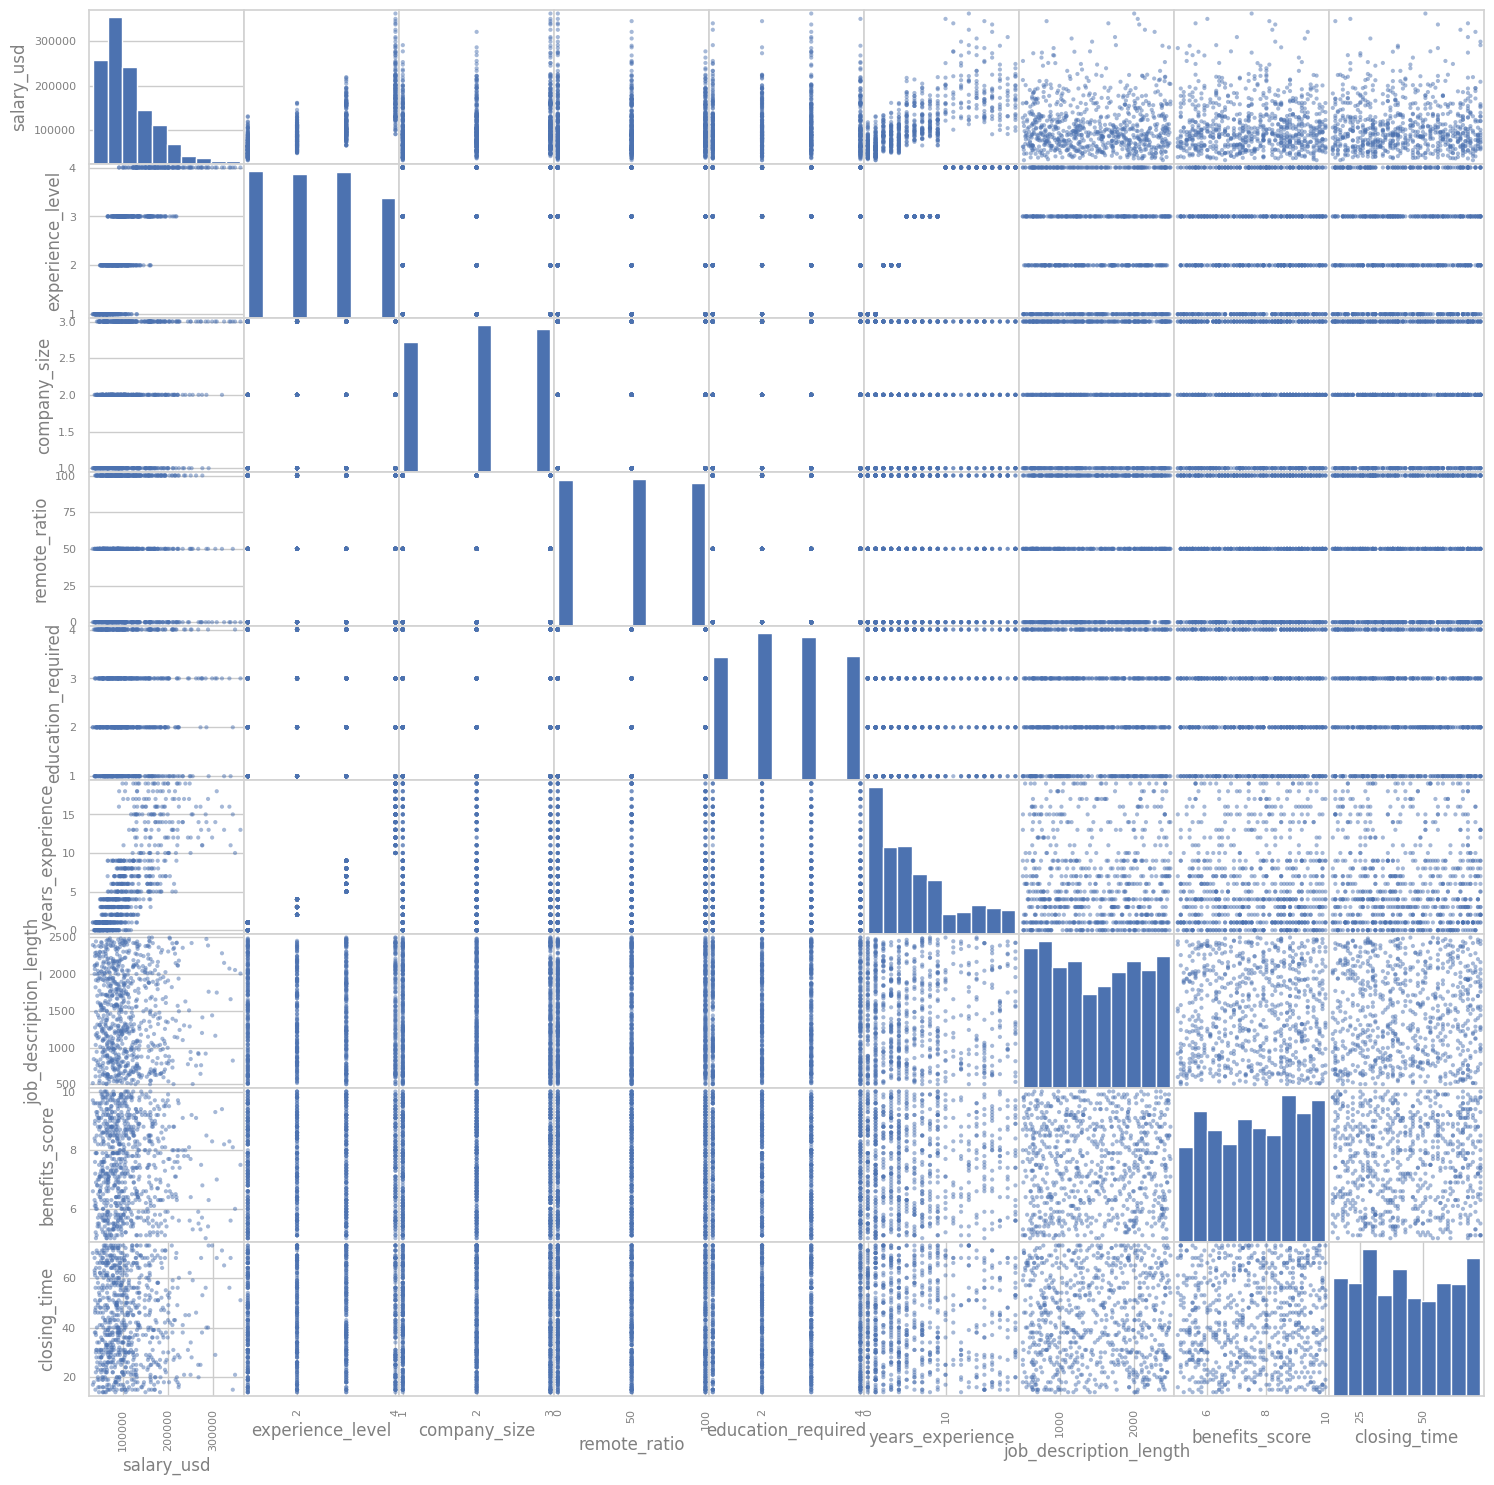

In [17]:
scatter_matrix(df_num, alpha=0.5, figsize=(18, 18));

Algumas relações aparentam ser lineares.

<br></br>
4\) Normality  
As distribuições das variáveis devem ser normais (ou aproximadamente).

**QQ-PLOT**  
Se os pontos se alinharem aproximadamente ao longo da linha reta no gráfico, a variável pode ser considerada normalmente distribuída.

In [18]:
from scipy import stats

In [19]:
def qq_subplots(df):
    # determine the number of rows
    nrows = (len(df.columns) + 1) // 2 # round up for odd numbers

    # create the subplots
    fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 4))

    # flatten the axes for easy iteration
    ax = ax.flatten()

    # QQ-plot graphs
    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=ax[i])
        ax[i].set_title(f"QQ-plot de {column}")

    # remove possible "empty" subplots
    for j in range(len(df.columns), len(ax)):
        fig.delaxes(ax[j])

    return plt.tight_layout()

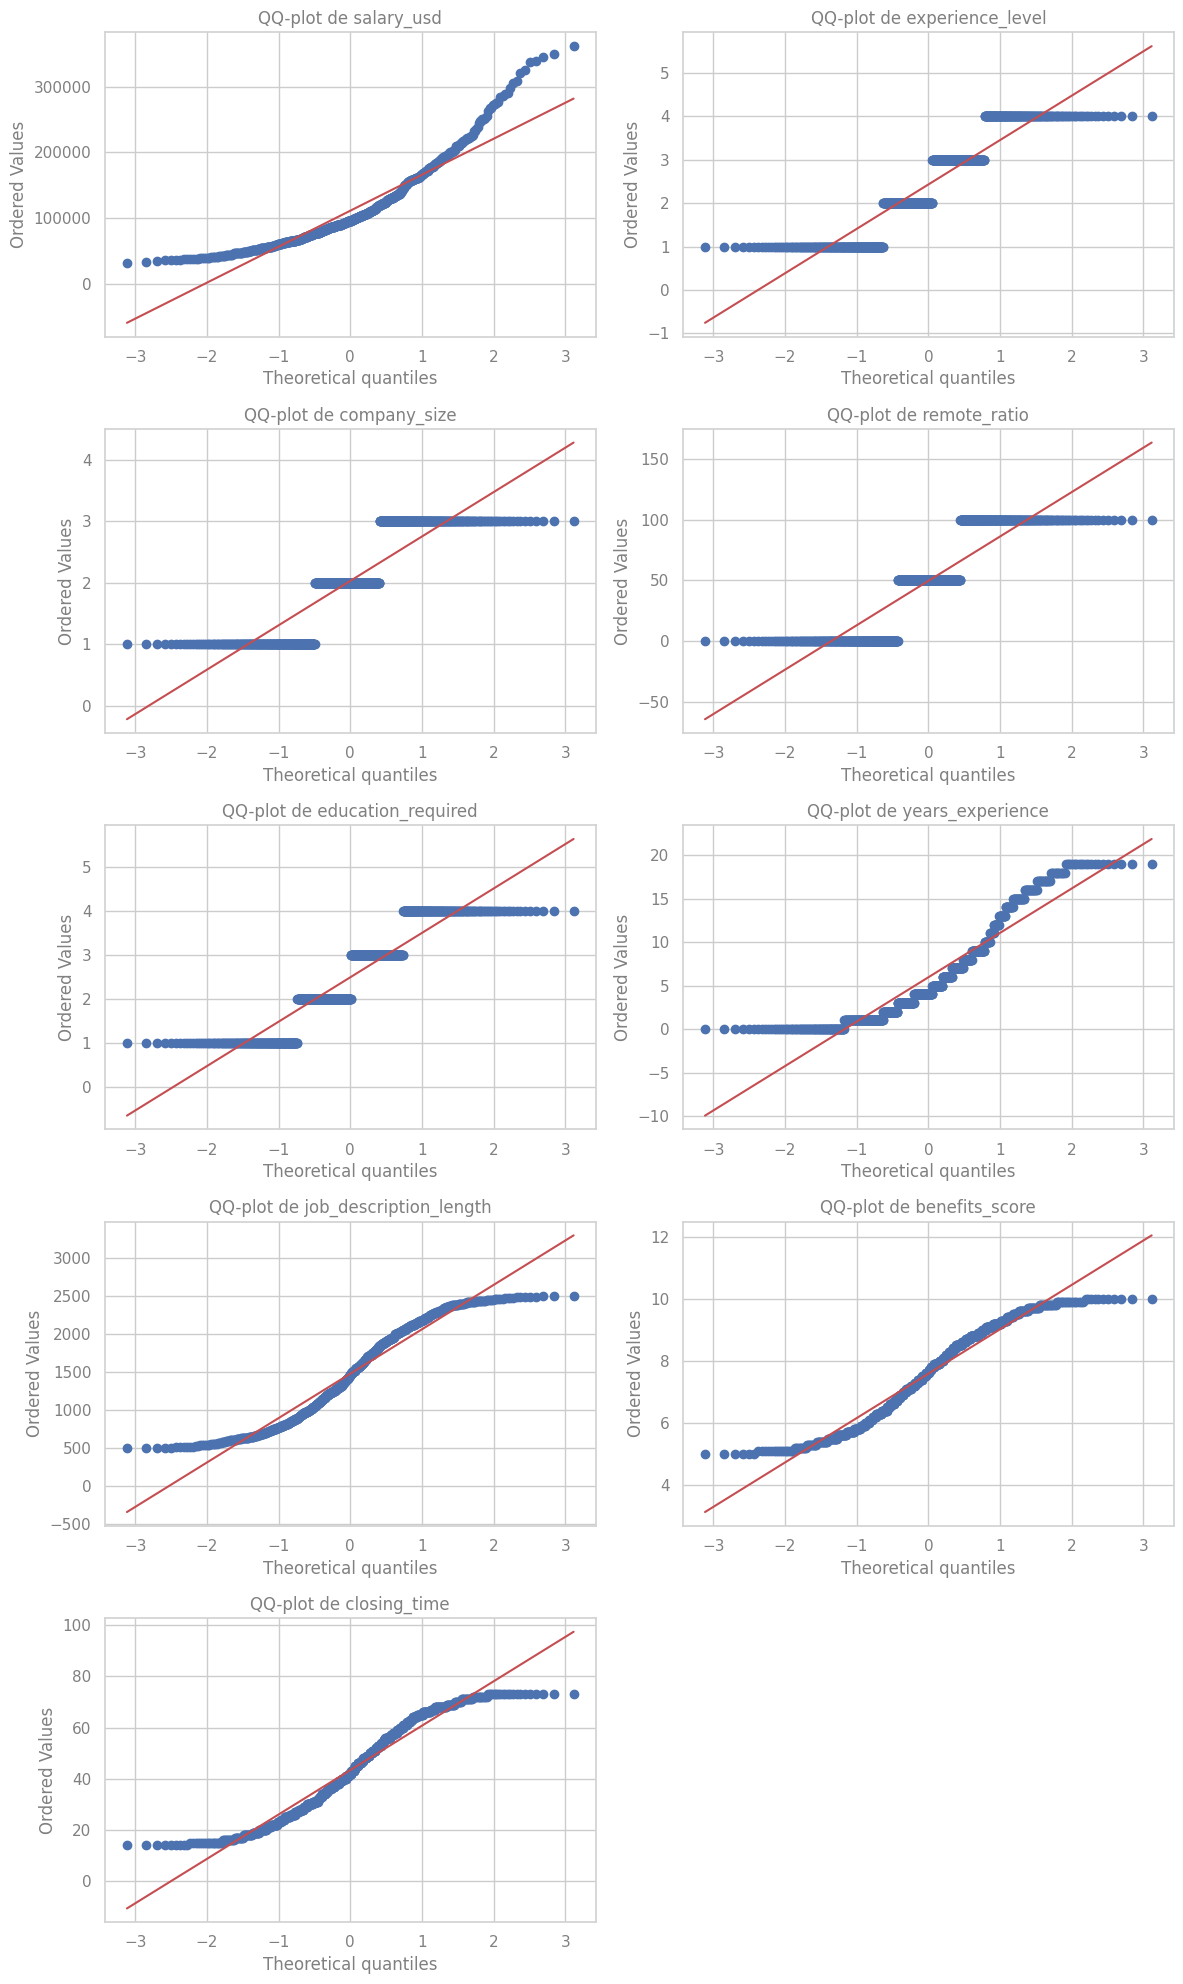

In [20]:
qq_subplots(df_num)

A partir dos gráficos, nenhuma distribuição aparenta ser normal. No geral, as mesmas possuem caudas pesadas.

**TESTES NUMÉRICOS**  
Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **H<sub>0</sub>**: A variável segue uma distribuição normal;
- **H<sub>1</sub>**: A variável não segue uma distribuição normal.

In [21]:
from statsmodels.stats.diagnostic import lilliefors
import warnings


def normality_tests(df):
    results = []

    # Captura avisos e aplica filtros
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is .*",
            category=UserWarning,
            module='scipy.stats._axis_nan_policy'
        )

        # Executa os testes de normalidade
        for i in df.columns:
            # O aviso de Shapiro será ignorado aqui
            shapiro = stats.shapiro(df[i])[1]
            lillie = lilliefors(df[i], dist="norm")[1]
            jarque = stats.jarque_bera(df[i])[1]
            anderson = stats.anderson(df[i], dist="norm")[1][2] # alpha = 0.05

            results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                            "JARQUE": jarque, "ANDERSON": anderson})

    # Retorna o DataFrame com os resultados
    return pd.DataFrame(results, index=df.columns)

In [22]:
normality_tests(df_num)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
salary_usd,1.127902e-22,0.001,2.748383e-83,0.783
experience_level,2.100543e-25,0.001,1.201647e-12,0.783
company_size,9.208712e-30,0.001,1.950114e-15,0.783
remote_ratio,6.586514e-30,0.001,5.399798e-16,0.783
education_required,5.277154e-25,0.001,7.200347e-12,0.783
years_experience,1.908722e-23,0.001,1.568743e-23,0.783
job_description_length,1.861053e-16,0.001,2.808237e-12,0.783
benefits_score,3.092682e-15,0.001,3.496960e-11,0.783
closing_time,1.068998e-15,0.001,2.127660e-11,0.783


Dado os resultados que no geral, foram menores que o nível de significância escolhido, assumimos a hipótese de não-normalidade.

<br></br>
## Spearman's Rho
Mede força, direção e significância do relacionamento entre duas variáveis quantitativas.

1\) Strength and direction  
A força da correlação indica quão fortemente duas variáveis estão relacionadas, já a direção, se a relação entre as mesmas é ascendente ou descendente.

| GRAU | COEFICIENTE |
| - | - |
| Perfeita | r = ±1 |
| Muito forte | ±0,8 ≤ r < ±1 |
| Forte | ±0,6 ≤ r <± 0,8 |
| Moderada | ±0,4 ≤ r < ±0,6 |
| Fraca | ±0,2 ≤ r < ±0,4 |
| Muito fraca | 0 < r < ±0,2 |
| Inexistente | r = 0 |

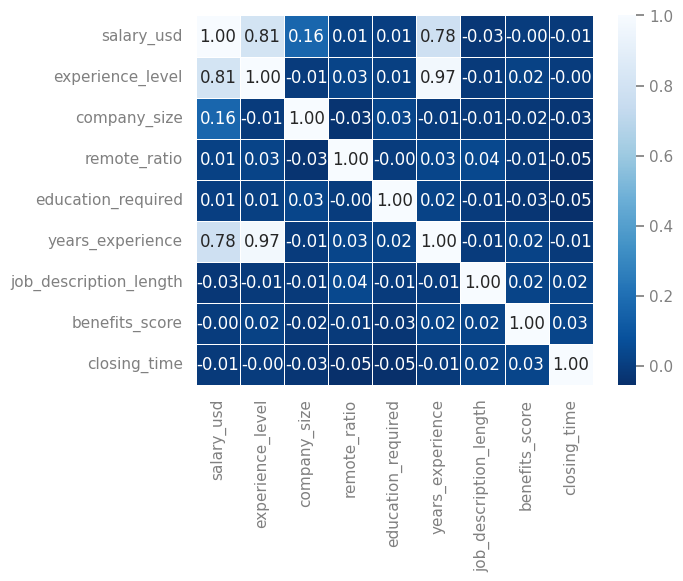

In [23]:
sns.heatmap(df_num.corr(method='spearman'), annot=True, fmt='.2f',
            cmap='Blues_r', linewidths=0.5);

O resultado da Correlação de Spearman apresenta duas relações contundentes: salary_usd x outras e experience_level x outras. Contudo, pelo fato de teoricamente experience_level x years_experience (correlação mais forte) serem redundates, vamos escolher a relação de salary_usd (e demais) para o estudo.

Principais correlações:

| GRAU | CORRELAÇÃO | COEFICIENTE |
| - | - | - |
| Muito forte | experience_level x years_experience <br></br> experience_level x salary_usd | 0.81–0.97 |
| Forte | salary_usd x years_experience | 0.78 |
| Muito fraca | salary_usd x company_size | 0.16 |

<br></br>
Principais insights:
1. Experiência na área (experience_level e years_experience):
  - São de longe os maiores drivers de salário: vagas mais seniores/executivas que exigem mais anos de experiência pagam salários maiores;
2. Tamanho da empresa (company_size):
  - Empresas maiores tendem a pagar um pouco mais, mas esse efeito é secundário em relação à experiência;
3. Demais variáveis - correlação quase nula:
  - remote_ratio, education_required, job_description_length, benefits_score e até o prazo de inscrição (closing_time) estão praticamente independentes do salário. Esses atributos, isoladamente, pouco ajudam a prever salário usando apenas correlação de posto.

<br></br>
2\) Statistical significance  
Descreve se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α)**: 0,05.

Hipóteses:
- **H<sub>0</sub>**: Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>**: Há correlação significativa entre as variáveis.

In [24]:
cols_sig = [i for i in df_num.columns if i != 'salary_usd']

In [25]:
estats = []
p_values = []
significativas = []

for i in cols_sig:
    estat, p_value = stats.spearmanr(df_num['salary_usd'], df_num[i])
    estats.append(estat)
    p_values.append(p_value)
    significativas.append('Sim' if p_value < 0.05 else 'Não')

pd.DataFrame({'statistic': estats, 'p-value': p_values,
              'significativa': significativas}, index=cols_sig)

,statistic,p-value,significativa
experience_level,0.808265,2.693172e-176,Sim
company_size,0.164995,4.889946e-06,Sim
remote_ratio,0.012257,7.360042e-01,Não
education_required,0.006231,8.639250e-01,Não
years_experience,0.780395,1.590637e-156,Sim
job_description_length,-0.025885,4.764214e-01,Não
benefits_score,-0.002369,9.480391e-01,Não
closing_time,-0.009784,7.878358e-01,Não


Interpretação:
1. Significativas:
  - **Experience_level e years_experience:** invalidam-se mutuamente, mas ambas mostram relação estatisticamente robusta com o salário;
  - **Company_size:** embora o coeficiente de correlação fosse moderado (~0,19), seu p-valor praticamente zero indica que esse efeito não é fruto do acaso;
  - **Remote_ratio:** mesmo com correlação quase nula, a grande amostra faz essa relação ser estatisticamente detectável.
2. Não significativas:
  - **remote_ratio, education_required, job_description_length, benefits_score, closing_time:** não apresentam evidência de associação com o salário, ao menos no teste univariado.
3. Cuidados
  - **Teste univariado vs. multivariado:** significância isolada pode mudar quando se inclui múltiplas variáveis juntas (efeito de confounders).
  - **Tamanho de efeito:** p-value só diz "o efeito não é nulo", mas não quão grande ele é. Com isso, é bom conferir também coeficientes (em modelos lineares) ou importâncias (em modelos de árvore).

Principais insights:
- **Modelagem:** devemos incluir apenas variáveis significativas (ou, no mínimo começar por elas) — destacando que experience_level e years_experience são redundantes entre si;
- **Efeito prático x estatístico:** é preciso tomar cuidado com o remote_ratio, pois embora estatisticamente significativo, seu coeficiente de correlação próximo de zero indica relevância nula na prática, para predizer salário.

<br></br>
# HYPOTHESIS TESTING
Vamos verificar se há diferença substâncial de salários entre os níveis de cargos.

1\) Teste de Kruskal-Wallis  
Versão não-paramétrica do ANOVA para comparar mais de dois grupos independentes.

Critérios:
- **Nível de significância (α)**: 0,05.

Hipóteses:
- **H<sub>0</sub>**: Todas as populações (grupos) têm a mesma distribuição de salário;
- **H<sub>1</sub>**: Pelo menos um grupo difere em distribuição.

In [26]:
groups_exp = df_num['experience_level']

In [27]:
# Cada item será a série de salary_usd para um nível de experiência diferente
groups = [df_num[groups_exp == i]['salary_usd'] for i in groups_exp.unique()]

In [28]:
stats.kruskal(*groups)

KruskalResult(statistic=np.float64(497.0840038926109), pvalue=np.float64(2.0445891507783103e-107))

Como o p-valor é (praticamente) zero, rejeitamos H<sub>0</sub>, ou seja, há evidência estatística de que existe diferença na distribuição dos salários conforme o nível de experiência, em pelo menos dois casos.

<br></br>
2\) Teste Post-hoc de Dunn com ajuste de Bonferroni  
Calcula exatamente quais pares de níveis diferem.  
Critérios:
- **Nível de significância (α)**: 0,05.

Hipóteses:
- **H<sub>0</sub>**: A distribuição de postos de salário no grupo x é igual à do grupo y;
- **H<sub>1</sub>**: As distribuições de postos de salário nos grupos x e y são diferentes.

In [29]:
import scikit_posthocs as sp

In [30]:
sp.posthoc_dunn(df_num, val_col='salary_usd', p_adjust='bonferroni',
                group_col='experience_level')

,1,2,3,4
1,1.000000e+00,2.050598e-10,2.380518e-44,2.555965e-97
2,2.050598e-10,1.000000e+00,7.775369e-13,1.080354e-47
3,2.380518e-44,7.775369e-13,1.000000e+00,1.601738e-13
4,2.555965e-97,1.080354e-47,1.601738e-13,1.000000e+00


Os resultados do teste concluem que todas as comparações entre níveis de experiência são estatisticamente significativas:

| Comparação | p-valor ajustado | Significativa |
| - | - | - |
| 1 vs. 2 (EN vs. MI) | 2,05 x 10<sup>-10</sup> | **Sim** |
| 1 vs. 3 (EN vs. SE) | 2,38 x 10<sup>-44</sup> | **Sim** |
| 1 vs. 4 (EN vs. EX) | 2,56 x 10<sup>-97</sup> | **Sim** |
| 2 vs. 3 (MI vs. SE) | 7,78 x 10<sup>-13</sup> | **Sim** |
| 2 vs. 4 (MI vs. EX) | 1,08 x 10<sup>-47</sup> | **Sim** |
| 3 vs. 4 (SE vs. EX) | 1,60 x 10<sup>-13</sup> | **Sim** |

Todos os níveis de experiência têm distribuições de salário distintas.
Não há par de níveis (EN, MI, SE, EX) cuja diferença salarial possa ser atribuída ao acaso.

<br></br>
3\) Cliff's Delta  
Medida de efeito não-paramétrica que quantifica o grau de separação/ordenação entre duas distribuições de dados.  
Benchmarks de Cliff's Delta:

| \|δ\| | Interpretação |
| - | - |
| < 0,147 | Negligível |
| 0,147 – 0,33 | Pequeno |
| 0,33 – 0,474 | Médio |
| 0,474 – 0,60 | Grande |
| 0,60 – 0,80 | Muito grande |
| 0,80 – 1,00 | Extremamente grande |

In [31]:
from itertools import combinations
import cliffs_delta as cd

In [32]:
levels = list(df_num['experience_level'].unique())

In [33]:
results = {}

for (i, j) in combinations(range(len(groups)), 2):
    lvl_i, lvl_j = levels[i], levels[j]
    delta, _ = cd.cliffs_delta(groups[i], groups[j])
    results[(lvl_i, lvl_j)] = delta

for (lvl_i, lvl_j), delta in results.items():
    print(f"{lvl_i} x {lvl_j}: Cliff's delta = {delta:.3f}")

3 x 2: Cliff's delta = 0.566
3 x 4: Cliff's delta = -0.701
3 x 1: Cliff's delta = 0.877
2 x 4: Cliff's delta = -0.948
2 x 1: Cliff's delta = 0.563
4 x 1: Cliff's delta = 0.991


| Tamanho de efeito | Comparação | Interpretação |
| - | - | - |
| Grande | 3 x 2 (SE x MI) | Salários de Sênior tendem ser maiores que os de Intermediário na maioria das comparações. |
| Muito grande | 3 x 4 (SE x EX) | O sinal negativo significa que Executivos (EX) têm salários maiores que Sênior na maioria dos casos. |
| Extremamente grande | 3 x 1 (SE x EN) | Distribuição de salários de Sênior está quase sempre acima da de Iniciante. |
| Extremamente grande | 2 x 4 (MI x EX) | Executivos pagam mais que Intermediários quase sempre. |
| Grande | 2 x 1 (MI x EN) | Intermediários pagam mais que Iniciantes. |
| Extremamente grande | 1 x 4 (EN x EX) | Executivos pagam muito mais que Iniciantes quase sem sobreposição de distribuição. |

Principais insights:
- As maiores "distâncias" salariais são entre EN ↔ EX e MI ↔ EX, refletindo o salto substancial ao nível executivo;
- Mesmo a diferença mais "modesta" (SE vs MI) é um efeito grande;
- Os resultados confirmam não só a significância estatística, mas a relevância prática: cada avanço de nível de experiência vem acompanhado de um ganho salarial expressivo.

<br></br>
# REGRESSION

## Preprocessing
1\) One-Hot Encoding

In [34]:
df_reg = df_encoded.copy().query('job_title == "Data Analyst"')

In [35]:
cols_one_hot = ['industry', 'employment_type', 'company_location']

In [36]:
df_reg = pd.get_dummies(df_reg, columns=cols_one_hot, drop_first=True)

In [37]:
for i in df_reg.columns:
    if ('industry' in i) or ('employment_type' in i) or ('company_loc' in i):
        df_reg[i] = df_reg[i].astype('int8')

In [38]:
df_reg = df_reg.select_dtypes(include=['number'])

df_reg.head(1)

,salary_usd,experience_level,company_size,remote_ratio,education_required,years_experience,job_description_length,benefits_score,closing_time,industry_Consulting,industry_Education,industry_Energy,industry_Finance,industry_Gaming,industry_Government,industry_Healthcare,industry_Manufacturing,industry_Media,industry_Real Estate,industry_Retail,industry_Technology,industry_Telecommunications,industry_Transportation,employment_type_FL,employment_type_FT,employment_type_PT,company_location_Austria,company_location_Canada,company_location_China,company_location_Denmark,company_location_Finland,company_location_France,company_location_Germany,company_location_India,company_location_Ireland,company_location_Israel,company_location_Japan,company_location_Netherlands,company_location_Norway,company_location_Singapore,company_location_South Korea,company_location_Sweden,company_location_Switzerland,company_location_United Kingdom,company_location_United States
8,160710,3,3,0,4,7,551,9.3,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Hyperparameter Tuning
1\) Learning Curve

In [39]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [40]:
X = df_reg.copy().drop(columns=['salary_usd', 'experience_level',
                                'benefits_score', 'education_required',
                                'job_description_length'])

y = df_reg.copy().salary_usd

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [42]:
base_params = {
    'n_estimators': 200,      # número de árvores (aumentar para mais estabilidade)
    'max_depth': 10,          # profundidade máxima de cada árvore
    'min_samples_leaf': 3,    # restrição para folhas (regularização)
    'min_samples_split': 4,   # restrição para nós internos
    'max_features': 'sqrt',   # cada divisão olha sqrt(n_features) atributos
}

In [43]:
rf = RandomForestRegressor(
    **base_params,
    n_jobs=-1,
    random_state=42
    )

# Porcentagens do tamanho do dataset que queremos usar para treino
train_sizes = np.linspace(0.1, 1.0, 10)  # 10%, 20%, ..., 100% do conjunto de dados

In [44]:
# Retorna arrays: train_sizes_abs, scores_de_treino, scores_de_cv
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="r2",
    shuffle=True,       # embaralhar antes de dividir (recomendado)
    random_state=42,
    n_jobs=-1
    )

In [45]:
# Para cada tamanho de treino, temos 5 scores (por causa do cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

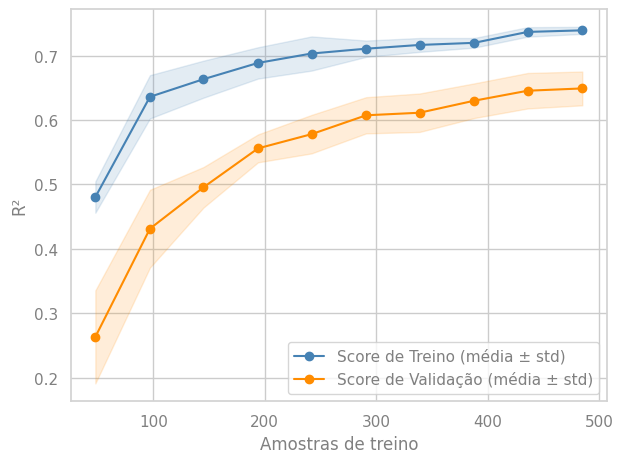

In [46]:
# Curva de treino
plt.fill_between(
    train_sizes_abs,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.15,
    color="steelblue"
    )

plt.plot(
    train_sizes_abs,
    train_scores_mean,
    'o-',
    color="steelblue",
    label="Score de Treino (média ± std)"
    )

# Curva de validação
plt.fill_between(
    train_sizes_abs,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.15,
    color="darkorange"
    )

plt.plot(
    train_sizes_abs,
    test_scores_mean,
    'o-',
    color="darkorange",
    label="Score de Validação (média ± std)"
)

plt.xlabel("Amostras de treino")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout();

Interpretação:
1. Overfitting moderado
  - O R<sup>2</sup> de treino está consistentemente acima do de validação;
  - O gap entre as duas curvas começa em torno de 0.2 e depois se estabiliza em ~0.1;
  - Isso indica variância no modelo: ele ajusta melhor o treino do que generaliza, mas não é um overfit dramático.
2. Pouca chance de underfitting
  - Se fosse underfit ("alto bias"), teríamos ambos os scores baixos e próximos. Aqui o R² de treino chega a 0.75, mostrando que o modelo tem capacidade de capturar boa parte do padrão;
3. Efeito do tamanho de amostra
  - Ambas as curvas sobem à medida que se dá mais dados de treino, o que significa que o aumento ainda traz ganho.
  - Ainda assim, o ponto de inflexão já começa a aparecer: depois de ~300–400 amostras, o ganho em R<sup>2</sup> tanto no treino quanto na validação diminui, sinalizando que está se aproximando do "diminishing return" de dados.

Decisão:
1. **Controlar a profundidade:** Reduzir max_depth para evitar que árvores muito profundas capturem ruído;
2. **Regularizar via folhas mínimas:** Aumentar min_samples_leaf ou min_samples_split para que cada folha tenha um número mínimo maior de amostras;
3. **Subamostragem de recursos:** Ajuste max_features para usar menos variáveis por divisão, reduzindo correlações e variância;
4. **Aumentar o número de árvores** Subir n_estimators pode diminuir o erro de estimação do RF, mas cuidado com o custo computacional.

Resultados:

| Amostras | R² treino (média) | R² validação (média) | Gap (treino–validação) |
| - | - | - | - |
| 50 | ≈ 0.48 | ≈ 0.26 | ≈ 0.22 |
| 100 | ≈ 0.64 | ≈ 0.43 | ≈ 0.21 |
|     200    |       ≈ 0.68      |        ≈ 0.56        |          ≈ 0.12          |
|     300    |       ≈ 0.71      |        ≈ 0.61        |          ≈ 0.10          |
|     400    |       ≈ 0.72      |        ≈ 0.63        |          ≈ 0.09          |
|     500    |       ≈ 0.75      |        ≈ 0.65        |          ≈ 0.10          |

<br></br>
2\) Validation Curve

In [47]:
from sklearn.model_selection import validation_curve

In [48]:
# Hiperparâmetros e seus ranges
hyperparams = [
    ('max_depth', np.arange(8, 30, 2)),
    ('min_samples_leaf', np.arange(2, 12, 2)),
    ('min_samples_split', np.arange(2, 14, 2))
    ]

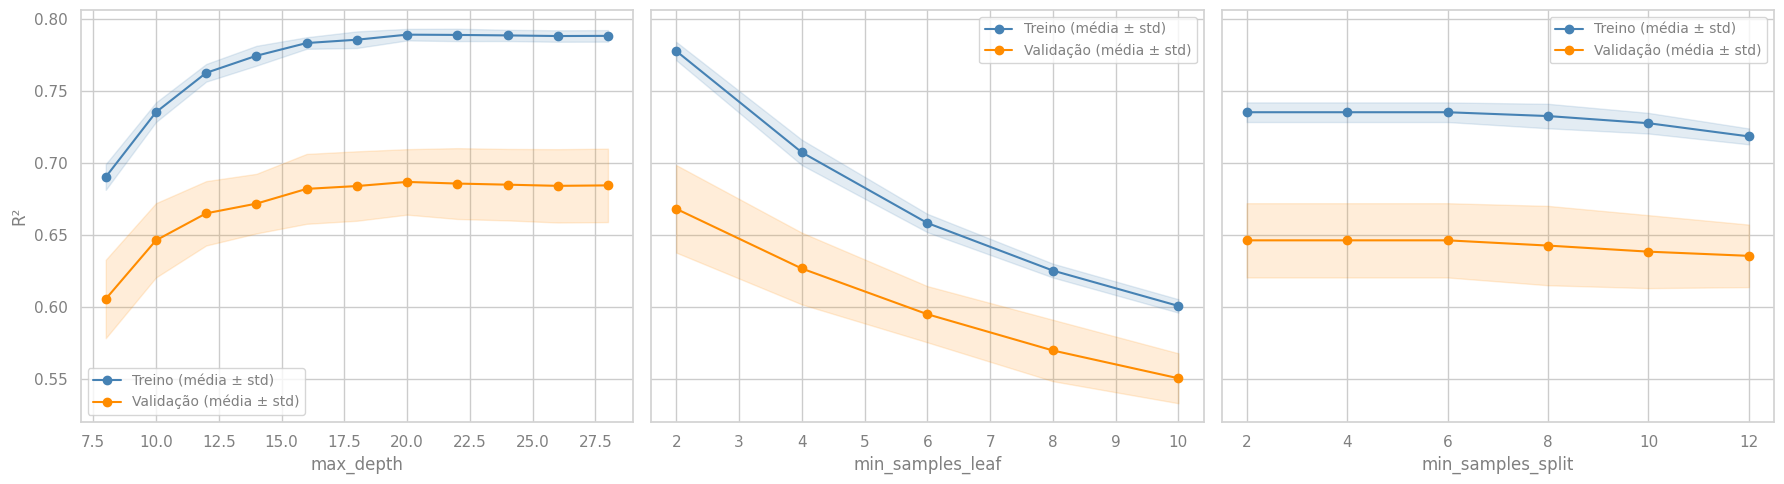

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for ax, (param_name, param_range) in zip(axes, hyperparams):
    value = base_params[param_name]
    del base_params[param_name]

    # Instancia o RandomForest sem o hiperparâmetro em questão
    rf = RandomForestRegressor(
        **base_params,
        random_state=42,
        n_jobs=-1
    )

    base_params[param_name] = value

    # Calcula a validation curve para o hiperparâmetro atual
    train_scores, val_scores = validation_curve(
        estimator=rf,
        X=X_train,
        y=y_train,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring="r2",
        n_jobs=-1,
        verbose=0
    )

    # Calcula média e desvio-padrão
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # Plot no eixo correspondente
    ax.fill_between(
        param_range,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.15,
        color="steelblue"
    )
    ax.plot(
        param_range,
        train_mean,
        'o-',
        color="steelblue",
        label="Treino (média ± std)"
    )
    ax.fill_between(
        param_range,
        val_mean - val_std,
        val_mean + val_std,
        alpha=0.15,
        color="darkorange"
    )
    ax.plot(
        param_range,
        val_mean,
        'o-',
        color="darkorange",
        label="Validação (média ± std)"
    )

    #ax.set_title(f"{param_name}")
    ax.set_xlabel(param_name)
    ax.grid(True)
    ax.legend(loc="best", fontsize='small')

# Apenas o primeiro gráfico recebe o ylabel para não ficar repetitivo
axes[0].set_ylabel("R²")

plt.tight_layout();

| Hiper-parâmetro | Valor testado | R² treino ↓ / Validação ↓ | Recomendação |
| - | - | - | - |
| **max\_depth** | 8 → 28 | Treino sobe de \~0.69 até \~0.79 e depois plana;<br></br>Validação sobe de \~0.60 até \~0.69 e depois praticamente não melhora. | **15–25** |
**min\_samples\_leaf** | 2 → 10 | Treino cai de \~0.78 → 0.60 (muito viés em valores altos);<br></br>Validação cai de \~0.67 → 0.55 em leaf ≥ 4. | **1–4**, com preferência por **2 ou 3** |
**min\_samples\_split** | 2 → 12 | Treino cai suavemente de \~0.735 → 0.72;<br></br>Validação de \~0.647 → 0.635 (praticamente flat, ligeiro pico em 4–6). | **2–6**, valor default (2) já é bom, mas **4–6** podem ajudar a reduzir variância. |


<br></br>
3\) Ajuste

In [50]:
# # No Colab, utilize o comando Ctrl + A para marcar tudo e Ctrl + ? para "descomentar"
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# param_dist = {
#     'n_estimators': randint(100, 400),
#     'max_depth': np.arange(14, 24, 2),
#     'min_samples_leaf': [2, 3],
#     'min_samples_split': np.arange(4, 10, 2),
#     'max_features': ['sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     scoring='r2',
#     n_iter=50,
#     cv=5,
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
#     )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_

# best_params

## Random Forest Regressor

In [51]:
best_params = {
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 4,
    'n_estimators': 266
    }

In [52]:
rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=266, n_jobs=-1,
                      random_state=42)

## Evaluation

### Interpretação  
Relacionamento das variáveis X em relação a y.

1\) Feature importance  
Indica quanto cada variável contribuiu, em média, para melhorar as divisões das árvores.

In [53]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

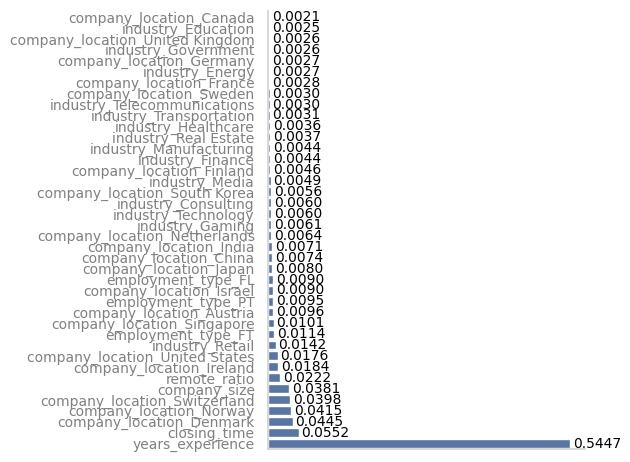

In [54]:
ax = sns.barplot(x=importances.values, y=importances.index)
plt.grid(False)
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('')
plt.yticks(fontsize=10)

# Valor nas barras
for i, v in enumerate(importances.values):
    plt.text(v + 0.005, i, f'{v:.4f}', ha='left', va='center', fontsize=10,
             color='black')

plt.tight_layout();

Interpretação:
- years_experience (≈ 0.545) domina totalmente o ranking, respondendo por mais de metade da redução de impureza;
- Logo em seguida, mas muito abaixo, vêm closing_time (~ 0.055) e company_location_Denmark/Norway/Switzerland (~ 0.04);
- Recursos como remote_ratio (~ 0.022) e company_size (~ 0.038) surgem num nível intermediário;
- Praticamente todas as demais variáveis (tipo de emprego, setor, outros países) ficam com importância < 0.02.

> **Obs.:** este método tende a privilegiar variáveis com muitas divisões possíveis e pode subestimar variáveis categóricas de baixa cardinalidade.

<br></br>
2\) Permutational Feature Importance  
Calcula redução média no score (ex.: no R²) ao permutar cada variável.

In [55]:
from sklearn.inspection import permutation_importance

In [56]:
perm_imp = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                  random_state=42)

In [57]:
perm_series = pd.Series(perm_imp.importances_mean, index=X_test.columns)

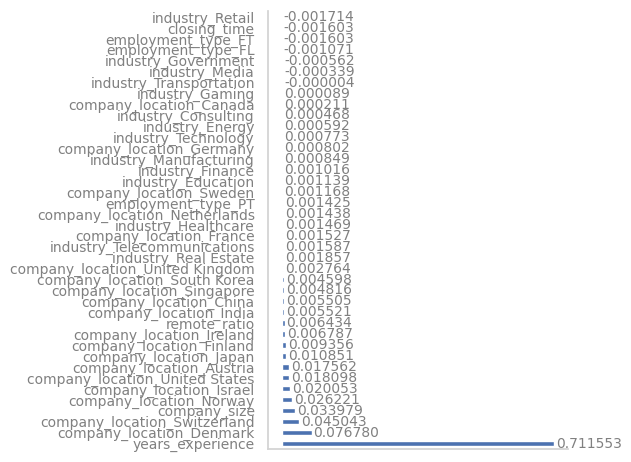

In [58]:
bars = perm_series.sort_values(ascending=False).plot.barh()

# Adicionar o valor ao lado de cada barra
for bar in bars.patches:
    bars.text(bar.get_width() + 0.005,  # Posição x do texto (um pouco à direita da barra)
              bar.get_y() + bar.get_height() / 2,  # Posição y do texto (centro vertical da barra)
              f'{bar.get_width():.6f}',  # Texto a ser exibido (formata para 4 casas decimais)
              va='center', # Alinhamento vertical
              fontsize=10)

plt.grid(False)
bars.spines['right'].set_visible(False)
bars.spines['top'].set_visible(False)
plt.yticks(fontsize=10)
# Desativar o eixo x
plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout();

Interpretação:
- years_experience (≈ 0.712) ainda é disparado o mais crítico: quando você embaralha essa coluna, o R² despenca em mais de 0.7;
- Na sequência, aparecem company_location_Denmark (≈ 0.077), company_location_Switzerland (≈ 0.045) e company_size (≈ 0.034);
- remote_ratio (≈ 0.006) e algumas localizações (Índia, China, EUA) também têm impacto mensurável, mas bem menor;
- Muitos setores e tipos de emprego chegam a impacto negativo (ou praticamente zero), indicando que eles pouco agregam ao poder preditivo.

> **Obs.**: A importância permutacional é mais confiável para comparar variáveis de naturezas diferentes, pois mede diretamente a perda de desempenho.

<br></br>
3\) SHAP (SHapley Additive exPlanations)  
Permite uma interpretação mais "justa" da contribuição de cada variável em cada previsão individual.

In [59]:
import shap

In [60]:
explainer = shap.TreeExplainer(rf)

In [61]:
shap_values = explainer.shap_values(X_test)

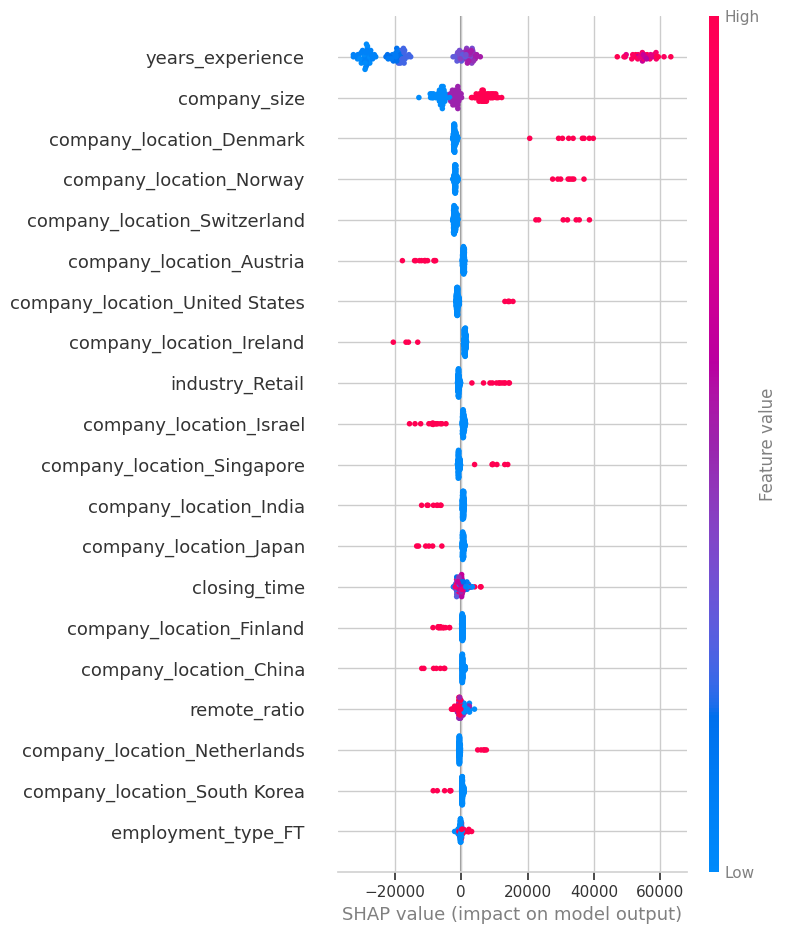

In [62]:
shap.summary_plot(shap_values, X_test)

Interpretação:
- **years_experience (topo)**: Pontos vermelhos (alto valor de "anos de experiência") empurram fortemente o SHAP value para a direita (aumentando a previsão de salário);
- **company_size (em segundo lugar)**: Cores claras (empresas maiores) empurram positivamente. Cores escuras (S, M) tendem a valores negativos ou neutros;
- **Localizações (Denmark, Norway, Switzerland etc)**: Alta contribuição positiva quando o emprego está em países de elevado poder de compra;
- closing_time, remote_ratio e algumas indústrias aparecem quase alinhados no zero, confirmando o baixo impacto.

Principais insights (geral):
- years_experience é disparado o maior preditor de salário — o modelo praticamente "aprendeu" primeiro a usar esse recurso e só depois os outros;
- Fatores geográficos (país da empresa) e porte da empresa aparecem em segundo plano, mas geram ganhos reais de R<sup>2</sup> quando permutados;
- Indústrias e tipos de emprego têm importância tão baixa que, em muitos casos, podem ser eliminados sem perda de performance (vide PFI negativa ou ≈ 0);
- Remote_ratio, apesar de ter correlação quase zero com o salário bruto, traz um pequeno valor preditivo (PFI ≈ 0.006).

Recomendações:
- **Refinar o encoding**: consolidar indústrias e países menos frequentes num "Other" para ganhar robustez;
- Avaliar interações com SHAP dependence plots (e.g. experience x company_size) para ver se há regimes não-lineares escondidos;
- **Simplificar o modelo**: remover features com PFI ≤ 0 ou com importância nativa muito baixa (< 0.01) e reavaliar o R<sup>2</sup> para ver se mantém performance;
- Testar outros algoritmos (e.g. Gradient Boosting) para checar se o ranking de variáveis se mantém e se há ganhos de R<sup>2</sup>.

<br></br>
4\) Partial Dependence Plot ([PDP](https://www.nb-data.com/p/partial-dependence-plots-pdps-to))  
Mostra como as previsões do modelo mudam à medida que um ou mais valores de entrada se alteram.

In [63]:
from sklearn.inspection import PartialDependenceDisplay

In [64]:
cols_pdp = ['years_experience', 'company_location_Denmark',
            'company_location_Switzerland', 'company_size', 'closing_time']

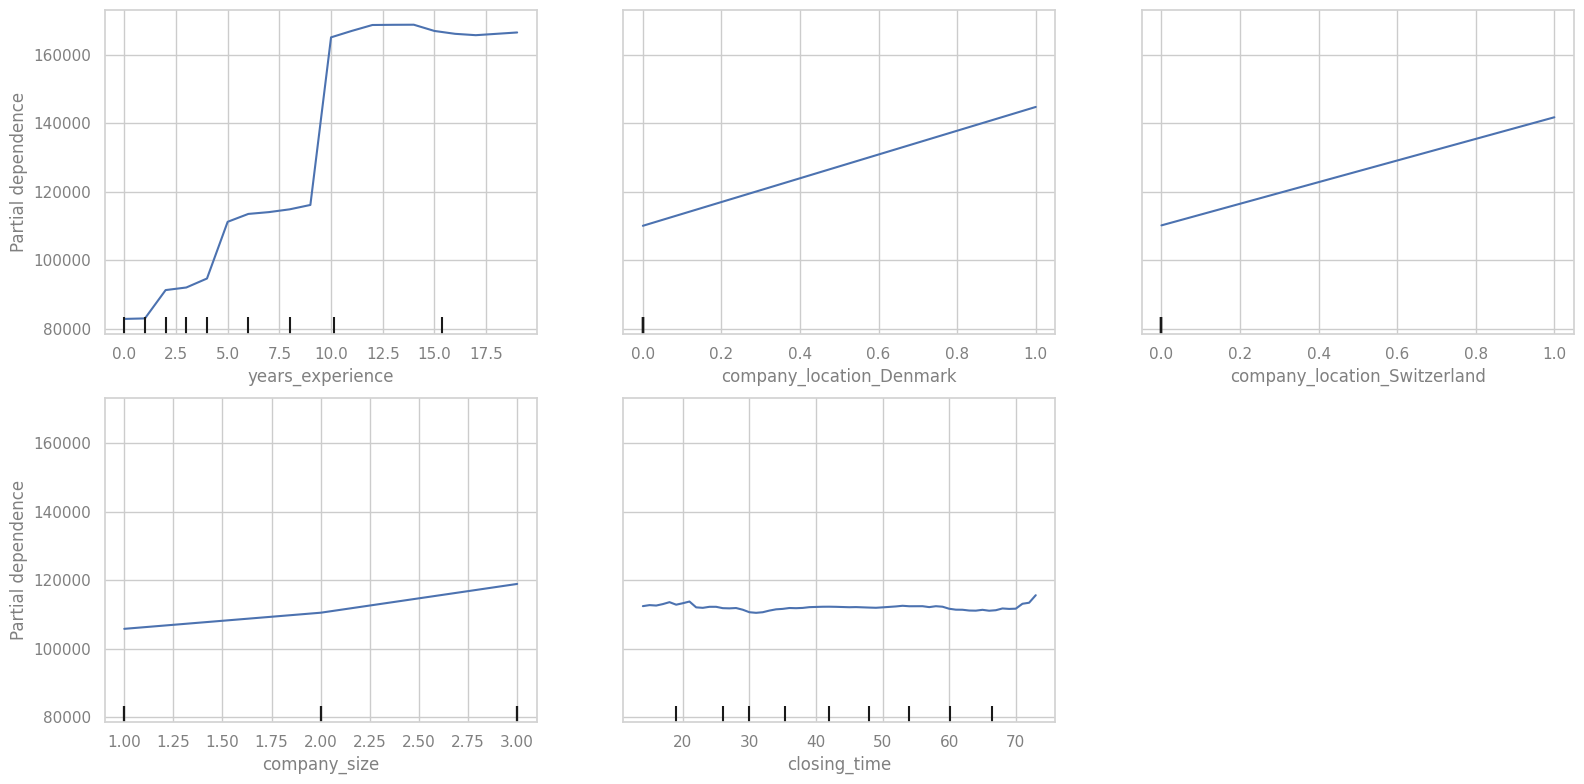

In [65]:
fig, ax = plt.subplots(figsize=(16, 8))

PartialDependenceDisplay.from_estimator(rf, X_test, cols_pdp, ax=ax)

plt.tight_layout();

Interpretação:
1. years_experience
  - **Curva em "degraus"**: o RF aprendeu saltos claros em torno de 5 e 10 anos — reflexo das divisões das árvores;
  - **Ganho rápido até ~10 anos**: a previsão sobe de ≈80K para ≈165K conforme você vai de 0 a 10 anos;
  - **Plateau após ~10–12 anos**: ganhos marginais praticamente se estabilizam em ≈170 K.
2. company_location_Denmark e company_location_Switzerland
  - Ao virar de 0 → 1 (não-Dinamarca → Dinamarca), a predição sobe de ≈110K para ≈ 45K (~+35K);
  - Para Suíça, o salto é semelhante (≈+30K).
3. company_size
  - S → ≈106K;
  - M → ≈ 110 K;
  - L → ≈ 119 K.
  - Embora a correlação bruta fosse fraca (≈0,16), o modelo enfim capturou que empresas grandes pagam, em média, ~10% a mais.
4. closing_time
  - A curva é praticamente plana em torno de 112K, com pequenas oscilações aleatórias;
  - Isso ratifica a baixa importância desse recurso — não faz diferença prática se a vaga fecha em 10 ou em 60 dias.

Sugestões:
- **Transformações para years_experience**: dado o plateau após 10 anos, talvez valha criar bins (0–5, 6–10, >10) ou usar splines para capturar esse regime de retornos decrescentes com mais suavidade;
- **Foco em localização**: crie dummies apenas para os top-5 países que realmente afetam o modelo (Dinamarca, Suíça, Noruega, Estados Unidos, Finlândia) e agrupe o resto em "Other" para reduzir ruído;
- **Simplificação**: closing_time pode ser descartado — o PDP mostra que não acrescenta quase nada;
- **Interações**: um PDP 2D ou SHAP dependence plot entre years_experience e company_size (ou localização) pode revelar se, por exemplo, executivos seniores em empresas grandes recebem um bump extra além do linear.

<br></br>
### Performance Metrics
Demonstram o desempenho do modelo.

1\) Coefficient of Determination (R<sup>2</sup>)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.dummy import DummyRegressor

In [67]:
y_pred = rf.predict(X_test)

In [68]:
r2_score(y_test, y_pred)

0.7227950762594118

O modelo explica cerca de 72% da variação total dos salários. Em um cenário com tantas fontes de ruído (setor, localização, etc.), esse pode ser considerado um resultado sólido.

<br></br>
2\) Baseline Model: Dummy Regressor (Mean Strategy)

In [69]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)

DummyRegressor()

In [70]:
# R² do dummy
dummy.score(X_test, y_test)

-0.0024344502523436784

O baseline que sempre previu a média teria até um R<sup>2</sup> levemente negativo (pior do que "nenhum modelo"), o que significa que o RF implementado reduz abruptamente o erro, transformando uma predição inútil em um preditor robusto.

<br></br>
3\) Root Mean Squared Error (RMSE)

In [71]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

31857.827189678963


O modelo erra em média USD ~32k anuais. Em um salário médio de, por exemplo, USD 120.000, esse RMSE equivale a um desvio-padrão de erro de ~27%.

<br></br>
4\) Mean Absolute Error (MAE)

In [72]:
mean_absolute_error(y_test, y_pred)

22476.664508615995

O erro médio absoluto indica que, em média, o modelo "erra" cerca de 22k USD por previsão, ou ~18% do salário médio.

Principais insights:
- Ganho real vs baseline
  - Passar de nenhum modelo (MAE ≈ salário médio ≈ ~120 k) para MAE ≈22 k significa economia de cerca de 100k USD de erro médio — um salto enorme em utilidade;
- RMSE e MAE
  - O fato de MAE (22k) ser menor que RMSE (32k) sugere que alguns poucos casos extremos (outliers muito altos ou baixos) estão puxando o RMSE para cima.

Recomendações:
1. Feature engineering
  - Transformação Log do salário (e depois reexponencia) para tratar outliers.
2. Modelos alternativos
  - Gradient Boosting (XGBoost, LightGBM) costuma superar RF em regressões tabulares;
  - Ensemble de RF + GBM + um regressão linear regularizada.
3. Redução de viés em outliers
  - Filtrar ou capping de salários extremos antes do treino, ou usar uma métrica robusta (quantile regression).
4. Validação adicional
  - Testar em um hold-out completamente separado ou via time-split (se houver componente temporal em posting_date/closing_time).

<br></br>
### Residuals

1\) Residuals vs Predicted Values

In [73]:
residuals = y_test - y_pred

In [74]:
df_residuals = pd.DataFrame({
    'salary_real': y_test,
    'salary_pred': y_pred,
    'residual': residuals
    })

In [75]:
predicteds = df_residuals.salary_pred

resid = df_residuals['residual']

In [76]:
figure = lambda w, h: plt.figure(figsize=(w, h))

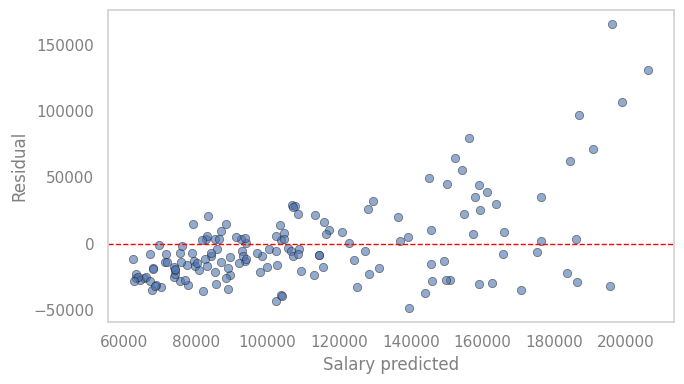

In [77]:
figure(7, 4)

plt.scatter(predicteds, resid, alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Salary predicted')
plt.ylabel('Residual')
plt.grid(False)
plt.tight_layout();

Interpretação:
1. **Heteroscedasticidade**
   * Nos salários mais baixos (predições em torno de 60–100K) os resíduos ficam bem concentrados em torno de zero;
   * À medida que a predição cresce (> 120K), a dispersão dos resíduos aumenta muito e vemos pontos até +150K;
   * Isso indica que o modelo erra muito mais (em valor absoluto) para vagas com salários previstos mais altos, sugerindo "variância crescente" conforme o alvo cresce.
2. **Tendência de viés em altos salários**
   * Há vários resíduos muito positivos para predições acima de ~150K: o modelo subestima salários muito altos.

3. **Ausência de padrão sistemático (níveis mais baixos)**
   * Entre ~70 K e ~120 K os pontos "orbitam" o zero de forma razoavelmente simétrica, sem clara curva ou tendência, o que é bom: não parece haver viés substancial nessa faixa.

<br></br>
2\) Top 5 largest residuals

In [78]:
df_residuals['abs_residual'] = df_residuals['residual'].abs()

In [79]:
df_residuals.sort_values(by='abs_residual', ascending=False).head()

,salary_real,salary_pred,residual,abs_residual
1415,361541,196005.408842,165535.591158,165535.591158
4304,336904,206267.714568,130636.285432,130636.285432
7071,305527,198869.741523,106657.258477,106657.258477
1734,284013,186898.377836,97114.622164,97114.622164
8878,235903,156122.426180,79780.573820,79780.573820


3\) Residual Distribution

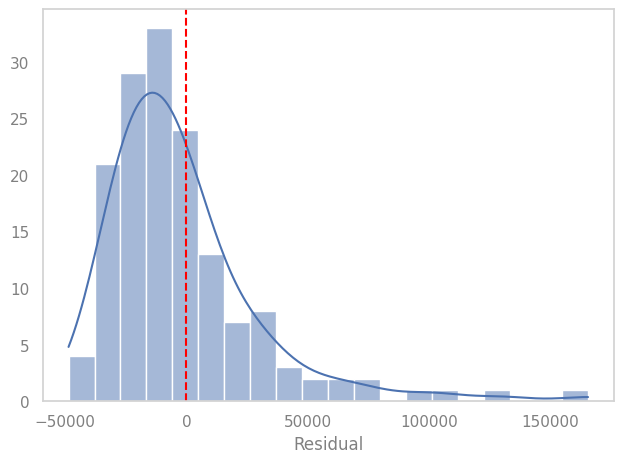

In [80]:
sns.histplot(resid, kde=True)
plt.xlabel('Residual')
plt.ylabel('')
plt.grid(False)
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout();

Interpretação:
- **Assimetria positiva**: a cauda longa à direita mostra que há casos em que o modelo subestima o salário (resíduos positivos altos) do que o contrário;
- **Moda levemente negativa**: o pico do KDE parece ocorrer um pouco abaixo de zero, o que indica um viés sutil de leve superestimação para salários baixos/médios.

<br></br>
4\) Residual Distribution (Absolut)

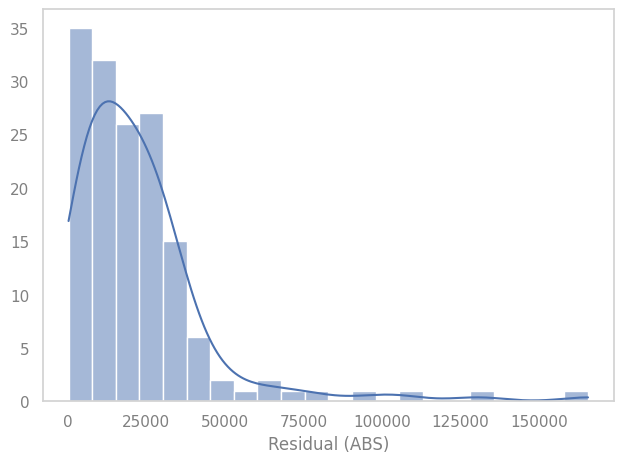

In [81]:
sns.histplot(df_residuals['abs_residual'], kde=True)
plt.ylabel('')
plt.xlabel('Residual (ABS)')
plt.grid(False)
plt.tight_layout();

Interpretação:
- **Concentração nos erros pequenos**: a maior parte das observações tem erro absoluto entre ~5k-30k USD;
- **Cauda longa**: ainda há uma fração relevante de casos com erro > 50k (alguns chegam a 150k), responsáveis por inflar o RMSE;
- **Distribuição assimétrica**: mostra que erros muito grandes não são raros.

<br></br>
5\) Boxplot

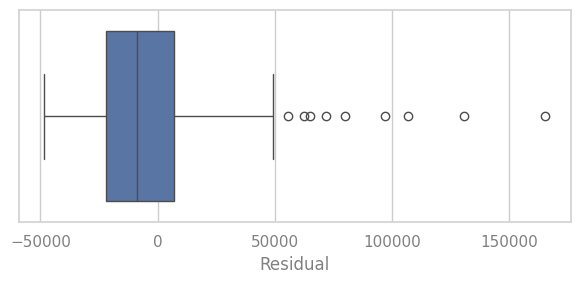

In [82]:
figure(6, 3)
sns.boxplot(x=resid)
plt.xlabel('Residual')
plt.tight_layout();

Inrpretação:
- **Mediana próxima de zero**: a linha central da caixa está ao redor de zero—bom sinal de bias global relativamente controlado;
- **IQR concentrado**: o box do 25º-75º percentile vai de aproximadamente –20k a +20 k USD (condizente com o MAE – ~22k);
- **Muitos outliers positivos**: círculos à direita mostram dezenas de casos extremos com erro > 50k USD.

Sugestões (Geral):
1. Log-transformar o alvo
   * Aplicar `y = log(salary_usd)` antes do treino reduz a heteroscedasticidade — o modelo passa a focar em preditar proporções em vez de diferenças absolutas, e depois basta reexponenciar com `exp(y_pred)`.
2. Modelar a variância explicitamente
   * Usar métodos de regressão quantílica (QuantileRegressor ou GBM quantílico) para capturar melhor a cauda dos salários altos.
3. Filtrar ou winsorizar outliers
   * Cerrar (capping) os salários extremos no topo (por ex., 95ᵒ percentil) pode reduzir o efeito de ruído desses casos no ajuste do RF.
4. Avaliar pesos ou amostragem estratificada
   * Dar maior peso a observações de faixa salarial alta durante o treino, de modo que o modelo não "priorize" apenas acertar a maior parte dos casos (lower mid-range).
5. Métricas robustas
  - Além de MAE e RMSE, avaliar o Median Absolute Error e percentis de erro (p.ex. 90ᵒ percentil do erro absoluto) para medir a experiência do “usuário típico” sem o ruído dos extremos.
6. Modelos alternativos
  - Regressão quantílica para predizer medianas ou outros quantis, oferecendo intervalos de confiança adaptados a diferentes faixas salariais;
  - Gradient Boosting com perda Huber ou outra função robusta que penalize menos outliers.
7. Features para outliers
  - Investigar se esses casos extremos compartilham características (empresas muito grandes, nichos de alta remuneração, cargos executivos excepcionais) e criar dummies ou interações específicas para capturar esses regimes.

### Cross-Validation

In [83]:
from sklearn.model_selection import KFold, cross_val_score

In [84]:
rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

In [85]:
# Definir o número de folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

In [87]:
for i, j in enumerate(scores):
    print(f'Fold {i+1}: {j}')
    if i == 4:
        print(f'Média:  {scores.mean()}')
        print(f'Desvio-padrão: {scores.std()}')

Fold 1: 0.753272384939109
Fold 2: 0.7081809481019511
Fold 3: 0.6919705540137031
Fold 4: 0.7027001413105957
Fold 5: 0.7324724690255942
Média:  0.7177192994781907
Desvio-padrão: 0.022186622318508105


Interpretação:
1. Desempenho geral
  - A média de R² ≈0.718 é consistente com o visto no hold-out (~0.722).
  - O desvio-padrão baixo mostra que as flutuações de fold para fold são pequenas;
2. Amplitude razoável
  - A menor pontuação (≈0.692) e a maior (≈0.753) diferem em apenas ~0.06. Isso sugere um leve efeito de variabilidade nos subconjuntos de treino/teste, mas nada alarmante.
3. Confiabilidade do modelo
  - Um coeficiente de variação (std/mean) de ≈0.03 (3 %) indica que o modelo tem boa robustez a mudanças nos dados de treino;
  - Em aplicações práticas, você pode esperar R<sup>2</sup> entre ~0.69 e ~0.75 em dados nunca vistos.
4. Overfitting controlado
  - Os scores de validação cruzada (≈0.69–0.75) estão próximos do R<sup>2</sup> de treino ajustado (0.722–0.75), reforçando que não há overfitting severo.

Sugestões:
1. **Intervalo de confiança**: reportar um 95% CI para o R<sup>2</sup> (por exemplo, média ± 2xstd → [0.673, 0.763]).
2. **Mais folds ou repetição**: para reduzir ainda mais a incerteza, usar 10-fold ou `RepeatedKFold`.
3. **Avaliação em hold-out temporal**: a partir de posting_date, reservar um bloco final para testar consistência futura.

# CLUSTERING DE SKILLS VIA EMBEDDINGS
Agrupa programaticamente as skills em categorias semânticas coerentes, permitindo identificar subconjuntos de competências que compartilham significado e uso. Para isso, usamos embeddings de texto (SBERT), redução de dimensionalidade (UMAP) e diferentes algoritmos de clustering (hierárquico, HDBSCAN, GMM), avaliados por métricas de coesão e separação, resultando em clusters estáveis.

1\. Data Preprocessing

In [88]:
df_nlp = df_encoded.copy()[df_encoded.job_title == 'Data Analyst']

In [89]:
# Extrair lista única de skills
skills_list = (
    df_nlp['required_skills']
        .str.split(',')
        .explode()
        .str.strip()
        .dropna()
        .unique()
        .tolist()
)

2\. Feature Extraction

In [90]:
from sentence_transformers import SentenceTransformer

In [91]:
# Carregar modelo SBERT e gerar vetores semânticos
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [92]:
embeddings = model.encode(skills_list, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

3\. Dimensionality Reduction  
1\) UMAP para 5D (para clustering mais estável)

In [93]:
import umap

In [94]:
proj_embeddings = umap.UMAP(
    n_components=5,
    min_dist=0.05,
    metric='cosine',
    random_state=42
).fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


2\) UMAP para 2D (para visualização)

In [95]:
proj2d = umap.UMAP(
    n_components=2,
    metric='cosine',
    random_state=42
).fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


4\. Clustering Models  
1\) Agglomerative Clustering

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [97]:
hier_cluster = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=1.5,   # corte escolhido
    linkage='average'
    )

In [98]:
labels_hier = hier_cluster.fit_predict(embeddings)

2\) HDBSCAN (Density-Based Clustering)

In [99]:
import hdbscan

In [100]:
hdbs_cluster = hdbscan.HDBSCAN(
    min_cluster_size=7,
    min_samples=1,
    metric='euclidean'
    )

In [101]:
labels_hdbs = hdbs_cluster.fit_predict(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


3\) Gaussian Mixture Model (GMM)

In [102]:
from sklearn.mixture import GaussianMixture

In [103]:
gmm = GaussianMixture(n_components=3, random_state=42)

In [104]:
labels_gmm = gmm.fit_predict(embeddings)

5\. Cluster Validation

| Métrica | O que mede | Interpretação ideal |
| - | - | - |
| **Silhouette** | Coesão vs. separação (–1 a +1) | Próximo de +1 é melhor |
| **Davies–Bouldin (DB)** | Razão de dispersão intra-/inter‑clusters (menor é melhor) | Valores baixos indicam clusters bem separados |
| **Calinski–Harabasz (CH)** | Variância entre vs. dentro (maior é melhor) | Valores altos indicam boa separação |

In [105]:
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

In [106]:
def compute_metrics(X, labels, name):
    # remove rótulo -1 (ruído) antes de contar clusters válidos
    n_labels = len(set(labels)) - (1 if -1 in labels else 0)

    if n_labels < 2:
        print(f'[{name}] Pulando métricas: apenas {n_labels} cluster válido.')
        return

    sil = silhouette_score(X, labels)
    db  = davies_bouldin_score(X, labels)
    ch  = calinski_harabasz_score(X, labels)

    print(f'[{name}] Silhouette: {sil:.3f} | DB: {db:.3f} | CH: {ch:.1f}')

1\) Espaço original (sem redução)

In [107]:
compute_metrics(embeddings, labels_hier, 'Hierárquico')
compute_metrics(embeddings, labels_hdbs, 'HDBSCAN')
compute_metrics(embeddings, labels_gmm, 'GMM')

[Hierárquico] Pulando métricas: apenas 1 cluster válido.
[HDBSCAN] Silhouette: 0.038 | DB: 2.956 | CH: 1.8
[GMM] Silhouette: 0.041 | DB: 2.714 | CH: 1.8


Interpretação:
1. Hierárquico
  - Produziu apenas 1 cluster válido: indica que, no corte escolhido, todas as observações caíram num mesmo grupo (sub-ótimo para segmentação).
2. HDBSCAN
  - Silhouette (quase zero): quase zero indica que os pontos estão mais ou menos à mesma distância de clusters vizinhos que do próprio, ou seja, muito sobreposição;
  - DB (relativamente alto): baixa separação;
  - CH (baixo): baixa “densidade” interna.
3. GMM
  - Interpretação parecida com a do HDBSCAN.

No espaço original seus embeddings não estão “facilmente” separáveis por esses métodos.

<br></br>
2\) Espaço reduzido (UMAP para 5 dimensões)

In [108]:
compute_metrics(proj_embeddings, labels_hier, 'Hierárquico (UMAP)')
compute_metrics(proj_embeddings, labels_hdbs, 'HDBSCAN (UMAP)')
compute_metrics(proj_embeddings, labels_gmm, 'GMM (UMAP)')

[Hierárquico (UMAP)] Pulando métricas: apenas 1 cluster válido.
[HDBSCAN (UMAP)] Silhouette: 0.182 | DB: 1.812 | CH: 11.4
[GMM (UMAP)] Silhouette: 0.185 | DB: 1.621 | CH: 13.6


1. Hierárquico (UMAP)
  - Novamente apenas 1 cluster válido no corte padrão.
2. HDBSCAN (UMAP)
  - Silhouette: melhora significativa;
  - DB: queda de ~6.16% em relação a 2.956;
  - CH: salto expressivo, quase 7x maior.
3. GMM (UMAP)
  - Os resultados se mostraram um pouco superior ao HDBSCAN.

Baseado puramente nas métricas de validação, a abordagem UMAP(5D) + GMM é a vencedora. Ela produziu os clusters mais coesos e bem separados. Com isso, a análise quantitativa está feita, contudo, a validação qualitativa é igualmente importante, portanto, se faz necessária.

<br></br>
3\) Reunião dos rótulos

In [109]:
# Construir DataFrame final com todos os rótulos
df_results = pd.DataFrame({
    'skill':        skills_list,
    'cluster_hier': labels_hier,
    'cluster_hdbs': labels_hdbs,
    'cluster_gmm':  labels_gmm
}).sort_values(['cluster_hier', 'cluster_hdbs', 'cluster_gmm'])

In [110]:
print(df_results)

                 skill  cluster_hier  cluster_hdbs  cluster_gmm
6              Tableau             0            -1            0
8                    R             0            -1            0
18                 NLP             0            -1            0
4           Kubernetes             0            -1            1
13                 SQL             0            -1            2
16  Data Visualization             0            -1            2
1                  Git             0             0            1
14               MLOps             0             0            1
15                 AWS             0             0            1
19              Docker             0             0            1
20               Azure             0             0            1
22                 GCP             0             0            1
0               Hadoop             0             0            2
12               Spark             0             1            0
2          Mathematics             0    

Aqui temos um caso clássico onde as métricas quantitativas entram em conflito com a análise qualitativa:
- **Métricas (quantitativo)**: GMM venceu por uma pequena margem;
- **Coerência (qualitativo)**: HDBSCAN venceu com folga.

Optamos pelos clusters gerados pelo HDBSCAN, sob a justificativa de que:
  1. **Coerência Temática**: Os clusters do HDBSCAN são mais distintos e fáceis de nomear e interpretar. Eles representam "personas" ou "áreas de especialização" mais claras no mundo da tecnologia;
  2. **Valor dos Outliers**: A identificação de skills como Tableau, Kubernetes e NLP como outliers (-1) é um insight valioso. O GMM foi "forçado" a alocá-los em algum lugar, criando clusters menos puros. O HDBSCAN está lhe dizendo que essas skills não se encaixam perfeitamente nos grupos principais, o que provavelmente reflete a realidade;
  3. **Intuição vs. Métrica**: O objetivo final da clusterização é gerar insights e estrutura que façam sentido para o negócio ou para a análise. Uma melhora marginal nas métricas (de 0.182 para 0.185 na Silhouette) não compensa a perda de interpretabilidade. Os clusters do HDBSCAN contam uma história mais clara.

Interpretação do HDBSCAN:
- Cluster -1 (Ruído / Outliers):
- Tableau, R, NLP, Kubernetes, SQL, Data Visualization
- **Interpretação**: as referidas skills não pertencem de forma clara a nenhum dos outros grupos densos que ele encontrou:
    1. Tableau, R, Data Visualization são de BI e Análise de Dados;
    2. SQL é uma linguagem de banco de dados, fundamental, mas distinta;
    3. Kubernetes é de infraestrutura/DevOps;
    4. NLP é um campo específico de IA.
- Cluster 0:
  - Git, MLOps, AWS, Docker, Azure, GCP, Hadoop
  - **Área proposta**: Cloud, MLOps e Infraestrutura de Dados.
  - **Interpretação**: Este cluster é extremamente coerente. As principais plataformas de nuvem (AWS, Azure, GCP), ferramentas essenciais de DevOps/MLOps (Git, Docker, MLOps) e uma ferramenta clássica de Big Data (Hadoop) podem ser encontradas nele.
- Cluster 1:
  - Spark, Mathematics, Python, TensorFlow, PyTorch, Java, Statistics, Scala, Linux, Deep Learning, Computer Vision
  - **Área proposta**: Data Science, Engenharia de ML e Programação Core.
  - **Interpretação**: Este cluster junta:
    1. Linguagens de programação centrais em dados (Python, Scala, Java);
    2. Fundamentos teóricos (Mathematics, Statistics);
    3. Frameworks de ML/DL (TensorFlow, PyTorch, Spark);
    4. Campos de aplicação (Deep Learning, Computer Vision);
    5. O sistema operacional base (Linux).

<br></br>
7\. Visualização de Clusters (2D Scatter Plot)

1\) Proporção dos eixos  
Se UMAP-1 e UMAP-2 tiverem variância muito distintas, `plt.axis('equal')` deve ser ajustado para evitar distorções visuais.

Critérios:
- 0.2 > Razão > 5.

In [111]:
var_umap1 = np.var(proj2d[:, 0])
var_umap2 = np.var(proj2d[:, 1])

print(f"Variância UMAP-1: {var_umap1:.3f}")
print(f"Variância UMAP-2: {var_umap2:.3f}")
print(f"Razão UMAP‑1/UMAP‑2: {var_umap1/var_umap2:.3f}")

Variância UMAP-1: 0.639
Variância UMAP-2: 1.416
Razão UMAP‑1/UMAP‑2: 0.451


A razão revela que o segundo componente tem cerca de 2x mais variância que o primeiro (1/0.45 ≈ 2.2), contudo, 0.45 está dentro de um intervalo razoável, ou seja, não há separação de escala tão grande que distorça visivelmente o shape dos clusters.

<br></br>
2\) Gráfico

In [112]:
from matplotlib.colors import ListedColormap

In [113]:
pal = sns.color_palette("colorblind", n_colors=3)

In [114]:
labels_final = df_results['cluster_hdbs'].values

In [115]:
cmap = ListedColormap(pal)

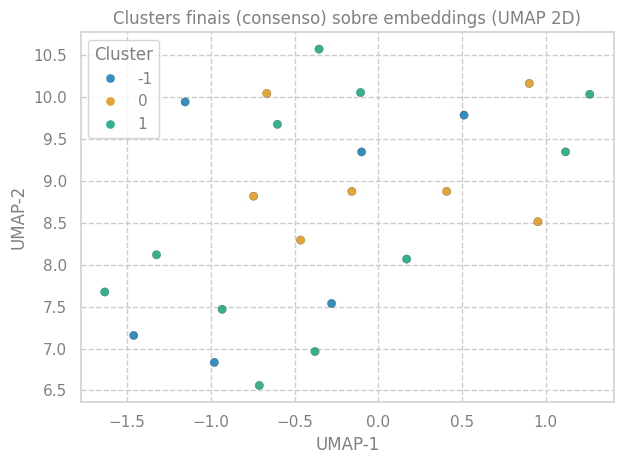

In [116]:
# 3) Plotar
scatter = plt.scatter(
    proj2d[:, 0],
    proj2d[:, 1],
    c=labels_final,
    cmap=cmap,
    alpha=0.8,
    edgecolor="k",    # opcional: bordas pretas para contraste
    linewidth=0.2
)

# 4) Legenda
handles, _ = scatter.legend_elements()
plt.legend(handles, sorted(set(labels_final)), title="Cluster")

plt.title("Clusters finais (consenso) sobre embeddings (UMAP 2D)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True, linestyle='--')
plt.tight_layout();

8\. Inspeção Detalhada de Clusters HDBSCAN (Cluster Inspection – Opcional)

1\) Contar clusters válidos e ruído

In [117]:
n_clusters = len(set(labels_hdbs)) - (1 if -1 in labels_hdbs else 0)
print(f'HDBSCAN gerou {n_clusters} clusters + {list(labels_hdbs).count(-1)} ruído')

HDBSCAN gerou 2 clusters + 6 ruído


2\) Agrupar skills por cluster

In [118]:
df_hdbs = pd.DataFrame({
    'skill': skills_list,
    'cluster': labels_hdbs
})

In [119]:
clusters = df_hdbs.groupby('cluster').skill.apply(list).to_dict()

3\) Impressão formatada

In [120]:
for cl, skills in clusters.items():
    name = 'ruído' if cl == -1 else f'Cluster {cl}'
    print(f'\n{name} ({len(skills)} skills):')
    for s in skills:
        print('  -', s)


ruído (6 skills):
  - Kubernetes
  - Tableau
  - R
  - SQL
  - Data Visualization
  - NLP

Cluster 0 (7 skills):
  - Hadoop
  - Git
  - MLOps
  - AWS
  - Docker
  - Azure
  - GCP

Cluster 1 (11 skills):
  - Mathematics
  - Python
  - TensorFlow
  - PyTorch
  - Java
  - Statistics
  - Scala
  - Spark
  - Linux
  - Deep Learning
  - Computer Vision


# CO-OCORRÊNCIA DE SKILLS VIA GRAFOS
Revela as relações empíricas entre skills, destacando quais competências aparecem juntas com maior frequência e como elas se organizam em sub-redes. Construímos um grafo ponderado de co-ocorrência, filtramos arestas por peso e aplicamos detecção de comunidades (Louvain) e centralidades (degree, betweenness), para identificar hubs, pontes e comunidades de skills, oferecendo uma visão estruturada das interdependências reais das competências no mercado.

<br></br>
1\. Data Preparation

In [121]:
df_nlp['skills_list'] = (
    df_nlp['required_skills']
        .str.split(',')
        .apply(lambda lst: [s.strip() for s in lst if s.strip()])
        )

2\. Contagem de Pares de Co-ocorrência (Edge Weight Computation)

In [122]:
from collections import Counter
import itertools

In [123]:
edge_counts = Counter()

In [124]:
for skills in df_nlp['skills_list']:
    for a, b in itertools.combinations(sorted(set(skills)), 2):
        edge_counts[(a, b)] += 1

3\. Montagem do Grafo Completo Ponderado (Graph Construction)

In [125]:
import networkx as nx

In [126]:
G = nx.Graph()

In [127]:
for (a, b), w in edge_counts.items():
    G.add_edge(a, b, weight=w)

4\. Filtragem de Arestas por Threshold (Edge Filtering)

1\) Definição e Aplicação dos Thresholds (Limiares)

In [128]:
weights = np.array([d['weight'] for _, _, d in G.edges(data=True)])

In [129]:
# 1) Threshold = mean + std
thr_mean_std = weights.mean() + weights.std()

# 2) Thresholds por percentil
thr_75 = np.percentile(weights, 75)
thr_90 = np.percentile(weights, 90)

In [130]:
# 3) Função que filtra e limpa grafo
def filtrar_grafo(G, threshold):
    H = nx.Graph(
        [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]
    )
    # remove nós isolados
    isolados = list(nx.isolates(H))
    H.remove_nodes_from(isolados)
    return H

In [131]:
# Aplica para cada threshold
g_mean_std = filtrar_grafo(G, thr_mean_std)
g_p75 = filtrar_grafo(G, thr_75)
g_p90 = filtrar_grafo(G, thr_90)

In [132]:
# 4) Imprime sumários
for label, g, thr in [
    ("Mean+Std", g_mean_std, thr_mean_std),
    ("Percentil 75", g_p75, thr_75),
    ("Percentil 90", g_p90, thr_90),
]:
    print(f"Threshold ({label} = {thr:.1f}):")
    print(f" → {g.number_of_nodes():2d} nós, {g.number_of_edges():3d} \
    arestas")

Threshold (Mean+Std = 24.7):
 → 21 nós,  36     arestas
Threshold (Percentil 75 = 22.0):
 → 24 nós,  72     arestas
Threshold (Percentil 90 = 26.0):
 → 21 nós,  32     arestas


Principais insights:
- Mean+Std (24.7): sinaliza valores acima do que "é normal" mais sua variação. Reduz quase à metade as arestas de P75, mantendo apenas conexões mais expressivas;
- P75 (22.0): é o mais "generoso" — conserva quase todas as conexões moderadas, aumentando bastante a densidade (72 arestas). Não obstante, pode trazer ruído (co-ocorrências não tão fortes);
- P90 (26.0): o mais restrito. Foca nas relações mais fortes, mas acaba eliminando algumas arestas que ainda eram "bem acima da média" (comparado ao Mean+Std sai de 36 pra 32 arestas).

Nosso objetivo é um grafo enxuto, que destaque apenas as co-ocorrências realmente fortes e evite saturar a visualização. Pensando nisso, optamos por escolher o Threshold baseado no Percentil 90.

<br></br>
2\) Análise Visual da Distribuição dos Pesos  
Visualização da distribuição dos pesos das arestas para entender onde os limiares de corte se posicionam em relação a mesma.

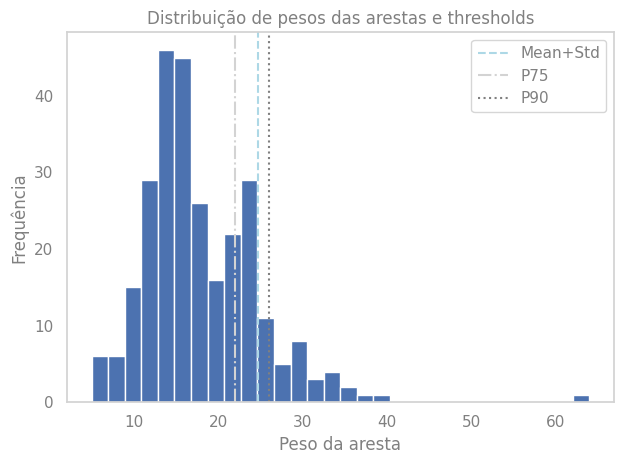

In [133]:
plt.hist(weights, bins=30)
plt.axvline(thr_mean_std, color='lightblue', linestyle='--', label="Mean+Std")
plt.axvline(thr_75, color='lightgray', linestyle='-.', label="P75")
plt.axvline(thr_90, color='gray', linestyle=':', label="P90")
plt.xlabel("Peso da aresta")
plt.ylabel("Frequência")
plt.title("Distribuição de pesos das arestas e thresholds")
plt.grid(False)
plt.legend()
plt.tight_layout();

A distribuição de pesos é claramente assimétrica à direita: há uma "cauda longa" com valores altos (até ~64), mas a grande maioria dos pesos concentra-se entre 5 e 30. Essa assimetria faz com que a média seja puxada para valores mais altos que o mediano, por isso o Mean + Std (≈24.7) fica acima do P75 (22.0).

<br></br>
5\. k-NN Graph (Local Neighborhood Graph)

In [134]:
k = 5 # vizinhos

Gk_p90 = nx.Graph()
for node in g_p90.nodes():
    # top‑k vizinhos mais fortes em g_p90
    nbrs = sorted(g_p90[node].items(), key=lambda x: -x[1]['weight'])[:k]
    for nbr, attr in nbrs:
        Gk_p90.add_edge(node, nbr, **attr)

# opcional: remover isolados
Gk_p90.remove_nodes_from(nx.isolates(Gk_p90))

print(f"k-NN graph sobre g_p90 (k={k}): {Gk_p90.number_of_nodes()} nós, \
{Gk_p90.number_of_edges()} arestas")

k-NN graph sobre g_p90 (k=5): 21 nós, 32 arestas


O resultado mostra que, para k=5, a filtragem em P90 já havia deixado cada nó com um número de conexões muito próximo ao desejado, e não foi necessário "completar" ou "podar" nada.

Sugestões:
- Considerar pular o k-NN ou testar com ks maiores (k=8, 10…) se desejado forçar vizinhanças mais densas.

6\. Community Detection

In [135]:
from community import community_louvain

In [136]:
partition_p90 = community_louvain.best_partition(
    g_p90,
    weight='weight',
    random_state=42
)

# agrupa nós por comunidade
coms_p90 = {}

In [137]:
for node, com in partition_p90.items():
    coms_p90.setdefault(com, []).append(node)

In [138]:
print("Comunidades (g_p90):")
for com, nodes in coms_p90.items():
    print(f"– Comunidade {com}: {len(nodes)} skills")

Comunidades (g_p90):
– Comunidade 0: 7 skills
– Comunidade 1: 9 skills
– Comunidade 2: 5 skills


Principais insights:
  - Há m grupo "central" de skills (comunidade 1) que tendem a co-ocorrer com uma maior variedade de pares fortes;
  - Existem dois grupos menores — um com forte coesão interna (5 skills) e outro um pouco maior (7 skills) —, provavelmente fachadas de nicho ou domínios de expertise mais específicos.

<br></br>
7\. Centrality Analysis  
1\) Degree Centrality

In [139]:
deg_cent_p90 = nx.degree_centrality(g_p90)

In [140]:
deg_cent_ord_p90 = sorted(deg_cent_p90.items(), key=lambda x: -x[1])

In [141]:
for node, cent in deg_cent_ord_p90:
    print(f"{node}: {cent}")

Python: 0.8500000000000001
Kubernetes: 0.35000000000000003
SQL: 0.25
TensorFlow: 0.2
Linux: 0.2
Scala: 0.2
MLOps: 0.15000000000000002
Git: 0.1
Hadoop: 0.1
Tableau: 0.1
Deep Learning: 0.1
PyTorch: 0.1
Java: 0.1
Mathematics: 0.05
NLP: 0.05
Azure: 0.05
Docker: 0.05
AWS: 0.05
Data Visualization: 0.05
GCP: 0.05
Computer Vision: 0.05


Interpretação:
1. **Python**: Com centralidade 0.85 (em que o máximo possível seria 1.0 num grafo de 21 nós), o nó Python está conectado a virtualmente todas as outras skills do subgrafo. É o grande "centro" da rede de co-ocorrências fortes: quase toda skill que aparece junto aparece antes ou depois em contexto Python.
2. **Segunda camada de hubs (0.35-0.20)**:
   - **Kubernetes (0.35)**: ocupa o segundo lugar, mas bem abaixo de Python — é um mini-hub, conectado a cerca de 7 ou 8 outros nós;
   - Em seguida vem *SQL*, *TensorFlow*, *Linux* e *Scala* (0.20) compondo um grupo intermediário: skills que também agregam várias co-ocorrências, mas longe de abarcar o espectro todo.
3. **Periferia (≤ 0.15)**: De *MLOps* a *Computer Vision*, a maioria das skills tem centralidade entre 0.15 e 0.05. São competências relativamente nichadas: aparecem forte em alguns pares, mas não se espalham por todo o grafo.

Principais insights:
* Python é "onipresente" no seu domínio de skills: praticamente todo par de co-ocorrência de alto peso envolve Python;
* Há um "abismo" entre Python e o restante: sinal de que seu domínio ou dataset enfatiza fortemente projetos ou contextos baseados em Python;
* As skills de centralidade intermediária (Kubernetes, SQL, TensorFlow, Linux, Scala) representam sub-hubs importantes, sugerindo áreas tecnológicas-chave que se conectam a vários outros tópicos;
* A cauda longa de centralidades baixas aponta competências especializadas ou de nicho, que só se relacionam fortemente em pequenos sub-conjuntos do grafo.

Recomendações:
- Como Python se conecta a quase tudo, ele pode "mascarar" a formação de clusters. Você poderia reavaliar comunidades removendo Python temporariamente para evidenciar melhor subgrupos sem a onipresença dele.


<br></br>
2\) Betweenness Centrality

In [142]:
btw_cent_p90  = sorted(nx.betweenness_centrality(g_p90, weight='weight')\
                       .items(), key=lambda x: -x[1])

In [143]:
for i, v in btw_cent_p90:
    print(f'{i}: {v}')

Python: 0.6842105263157895
Kubernetes: 0.1368421052631579
SQL: 0.11578947368421053
Tableau: 0.09473684210526316
Scala: 0.07368421052631578
MLOps: 0.042105263157894736
Linux: 0.031578947368421054
TensorFlow: 0.015789473684210527
Java: 0.005263157894736842
Git: 0.0
Hadoop: 0.0
Mathematics: 0.0
NLP: 0.0
Azure: 0.0
Docker: 0.0
AWS: 0.0
Data Visualization: 0.0
GCP: 0.0
Deep Learning: 0.0
Computer Vision: 0.0
PyTorch: 0.0


A análise revela quem são as "pontes" que mais frequentemente aparecem em caminhos mínimos entre pares de skills.

Interpretação:
1. **Python**:
   - Novamente aparece como a grande ponte: mais de 68% de todos os caminhos mais curtos entre quaisquer duas skills do grafo passam por ele;
   - Isso confirma que, além de ser um hub (alto grau), é também o principal intermediário entre diferentes subdomínios (comunidades) de análise de dados.
2. **Kubernetes (0.1368) e SQL (0.1158)**:
   * Estes têm o segundo e terceiro maiores valores. Embora bem abaixo de Python, eles ainda ocupam papel de conector importante: muitos caminhos entre skills de infraestrutura e skills analíticas passam por Kubernetes e SQL;
   * Em termos práticos, projetos de data analytics que envolvem orquestração (Kubernetes) e manipulação de bases relacionais (SQL) frequentemente unem diferentes blocos de tecnologias.
3. **Tableau (0.0947) e Scala (0.0737)**:
   * Tableau surge como uma ponte entre a camada de extração/transformação e a de visualização: caminhos que vão de, digamos, Hadoop ou Python a dashboards geralmente passam por Tableau;
   * Scala — possivelmente via Spark — conecta dados distribuídos (big data) a frameworks de processamento e modelagem.
4. **MLOps (0.0421) em diante**
   * MLOps, Linux, TensorFlow e Java têm valores modestos, mas ainda acima de zero, sinalizando que aparecem ocasionalmente em rotas entre grupos distintos de skills (por exemplo, do pipeline de deployment ao desenvolvimento de modelos);
   * Todas as demais (Git, Hadoop, AWS, NLP, etc.) têm betweenness zero: ou estão restritas a comunidades muito coesas ("ilhas") ou seus caminhos mínimos não requerem passar por elas para conectar outras skills.

Recomendações
* **Revelar pontes menores**: Se quiser destacar mais skills com pontes de betweenness > 0, experimente filtrar ou remover temporariamente Python para ver quais ficam como "segunda linha" de intermediários;
* **Outras métricas**: Betweenness mostra rotas globais, mas complementar com Closeness (quão rapidamente uma skill alcança todas as outras) e Eigenvector (influência em vizinhança) pode dar um panorama ainda mais rico.

Em suma, o g\_p90 deixa claro que Python não só "faz parte" de quase tudo, mas é o elo crítico entre setores de dados, e que Kubernetes, SQL e Tableau são os próximos grandes "pontes" no fluxo de informação dentro do domínio de data analytics.

<br></br>
8\. Visualização da "Espinha Dorsal" (g_p90)

In [144]:
# Reutiliza o resultado de partition_p90 e deg_cent_p90
pos_p90 = nx.spring_layout(g_p90, weight='weight', seed=42)
colors_p90 = [partition_p90[n] for n in g_p90.nodes()]

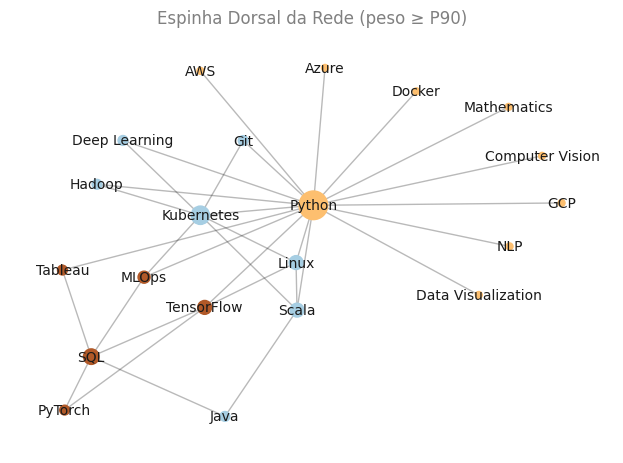

In [145]:
nx.draw_networkx_nodes(
    g_p90, pos_p90,
    node_size=[500 * deg_cent_p90[n] for n in g_p90.nodes()],
    node_color=colors_p90,
    cmap=plt.cm.Paired
    )

nx.draw_networkx_edges(g_p90, pos_p90, alpha=0.3)
nx.draw_networkx_labels(g_p90, pos_p90, font_size=10)

plt.title("Espinha Dorsal da Rede (peso ≥ P90)")
plt.axis('off')
plt.tight_layout();

O grafo mostra com clareza a predominância de Python no ecossistema de data analytics, e as três principais "ilhas" de competências — Big Data/infraestrutura, BI/modelagem e ecossistema em nuvem/subdomínios — todas conectadas por este hub central.